# APA CASE STUDY 2

#### BY,
### PY SAGAR
### CB.EN.P2AID20036

# 1. Sentimental Analysis

#### Topic:- Amazon Food Review

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [262]:
amazon_reviews = pd.read_csv("https://raw.githubusercontent.com/sagarpy/sagar-py/main/Final_Amazon_reviews.csv")

In [233]:
amazon_reviews.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
1,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...


In [234]:
amazon_reviews.shape

(40000, 10)

### Check Data Distribution

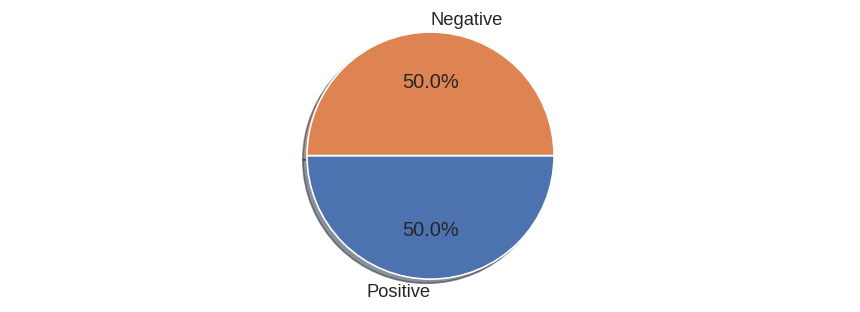

In [252]:
labels = ['Positive','Negative']
sizes = [len(amazon_reviews[amazon_reviews['Score']==5]),len(amazon_reviews[amazon_reviews['Score']==1])]
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.show()

### Removing the duplicate entries

In [236]:
sorted_df=amazon_reviews.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [237]:
sorted_df[sorted_df['UserId'] =='A327PCT23YH90']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
1,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...


In [238]:
df1 = sorted_df.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)

In [239]:
df1.shape

(34948, 10)

### Distribution of No: of words per user in the reviews

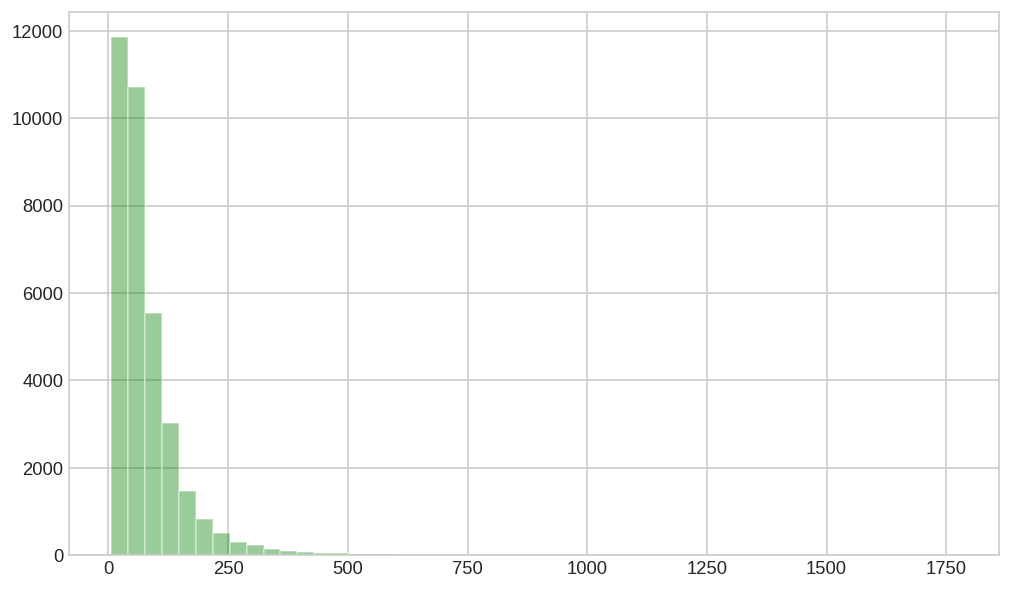

In [250]:
import seaborn as sns
fig,ax = plt.subplots(figsize = (10, 6))
word_count = df1.Text.apply(lambda x: len(x.split(" ")))
sns.distplot(np.array(word_count),ax =ax, color='green',kde=False)

### Converting comments to lower case characters.

In [24]:
df1['reviews_text_new'] = df1['Text'].str.lower()
print(df1['reviews_text_new'])

13878    this is one of the best children's books ever ...
13877    i give five stars to the maurice sendak story....
35319    our dogs just love them.  i saw them in a pet ...
15807    i selected this company over the other even th...
15806    i received all containers previously opened - ...
                               ...                        
20500    we've tried many tassimo flavors.  this is by ...
6555     i was very unimpressed with these almonds.  th...
3646     this trader joe's product is good quality.  bu...
13454    the most watery and tasteless pinot noir on th...
23614    purchased this product at a local store in ny ...
Name: reviews_text_new, Length: 34948, dtype: object


/home/pysagar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Removing Special Characters

In [25]:
### Selecting non alpha numeric charactes that are not spaces
spl_chars = df1['reviews_text_new'].apply(lambda review: [char for char in list(review) if not char.isalnum() and char != ' '])

## Getting list of list into a single list
flat_list = [item for sublist in spl_chars for item in sublist]

## Unique special characters
set(flat_list)

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '¢',
 '£',
 '§',
 '®',
 '°',
 '·'}

In [26]:

review_backup = df1['reviews_text_new'].copy()
df1['reviews_text_new'] = df1['reviews_text_new'].str.replace(r'[^A-Za-z0-9 ]+', ' ')
df1['reviews_text_new'] = df1['reviews_text_new'].str.replace('br',' ')

/home/pysagar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/home/pysagar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/pysagar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
print("- Old Review -")
print(review_backup.values[100])
print("\n- Updated Review -")
print(df1['reviews_text_new'].values[100])

- Old Review -
i have a number of nylabones that are natural in color and 5 years old.  our dog died 4 years ago and we kept the misc supplies.  now we have a new lab and she loves the natural ones, which she basically wears down slowly.<br />we also had some white nylabones that hadn't been used and our lab almost eats them.  first we saw pieces about the size of 1/4 a rice in her feces.  then i found her with a piece about the size of a dime in her mouth.  it was irregular and did not look like something that would pass easily.<br />we chucked the white ones and now i'm trying to find the good ones.<br />not so easy since websites show pictures of both so i'm not certain what we'd get.<br /><br />i would never give my dog these white nylabones.<br /><br />i did not buy nylabones here.  i'm searching for a source of the good ones that don't break into large chunks.<br /><br />i asked for advice at the nylabone site but have not heard from them.

- Updated Review -
i have a number of n

### Removing stop words from text.

In [29]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

In [30]:
df1['reviews_without_stopwd'] = df1['reviews_text_new'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop ))

/home/pysagar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
df1.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,reviews_text_new,reviews_without_stopwd
13878,150526,0006641040,A3E9QZFE9KXH8J,R. Mitchell,11,18,1,1129507200,awesome book poor size,This is one of the best children's books ever ...,this is one of the best children s books ever ...,one best children books ever written mini vers...
13877,150497,0006641040,A1HKYQOFC8ZZCH,"Maria Apolloni ""lanarossa""",2,2,1,1334707200,"The story is great, the softcover book is disa...",I give five stars to the Maurice Sendak story....,i give five stars to the maurice sendak story ...,give five stars maurice sendak story one star ...
35319,24751,2734888454,A1C298ITT645B6,Hugh G. Pritchard,0,0,5,1195948800,Dog Lover Delites,Our dogs just love them. I saw them in a pet ...,our dogs just love them i saw them in a pet ...,dogs love saw pet store tag attached regarding...


### Lemmatization

In [33]:
from nltk.stem import WordNetLemmatizer # Common Lematizer
wordnet_lemmatizer = WordNetLemmatizer()

In [34]:
df1['lemettized'] = df1['reviews_without_stopwd'].apply(lambda x : ' '.join(wordnet_lemmatizer.lemmatize(word) for word in x.split()))

/home/pysagar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df1.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,reviews_text_new,reviews_without_stopwd,lemettized
13878,150526,0006641040,A3E9QZFE9KXH8J,R. Mitchell,11,18,1,1129507200,awesome book poor size,This is one of the best children's books ever ...,this is one of the best children s books ever ...,one best children books ever written mini vers...,one best child book ever written mini version ...
13877,150497,0006641040,A1HKYQOFC8ZZCH,"Maria Apolloni ""lanarossa""",2,2,1,1334707200,"The story is great, the softcover book is disa...",I give five stars to the Maurice Sendak story....,i give five stars to the maurice sendak story ...,give five stars maurice sendak story one star ...,give five star maurice sendak story one star p...
35319,24751,2734888454,A1C298ITT645B6,Hugh G. Pritchard,0,0,5,1195948800,Dog Lover Delites,Our dogs just love them. I saw them in a pet ...,our dogs just love them i saw them in a pet ...,dogs love saw pet store tag attached regarding...,dog love saw pet store tag attached regarding ...
15807,171183,7310172001,AE9ZBY7WW3LIQ,W. K. Ota,5,13,1,1219363200,Why sbould I get crums?,I selected this company over the other even th...,i selected this company over the other even th...,selected company even though price higher hopi...,selected company even though price higher hopi...
15806,171180,7310172001,A2WDF9UM0M1VAD,susan m. kaitz,3,6,1,1317859200,Review of Freeze Dried Liver Treats For Dogs,I received all containers previously opened - ...,i received all containers previously opened ...,received containers previously opened seals op...,received container previously opened seal open...


### Positive Reviews Word cloud

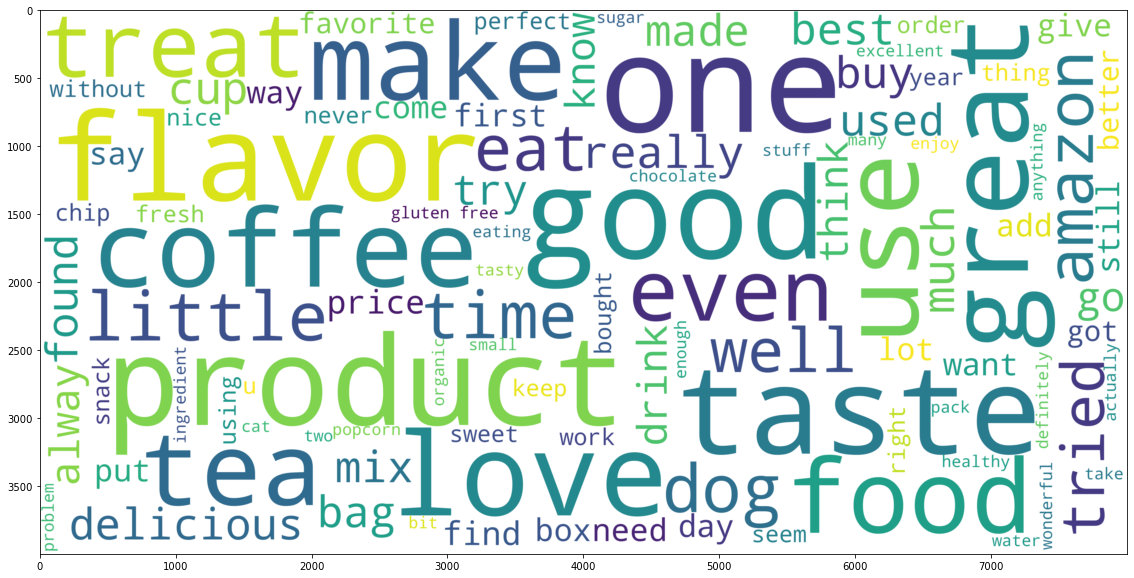

In [36]:
w1 = df1[df1['Score']==5]
wd_text1 = ''.join(w1['lemettized'])
wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(wd_text1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.show()

### Negative Reviews WordCloud

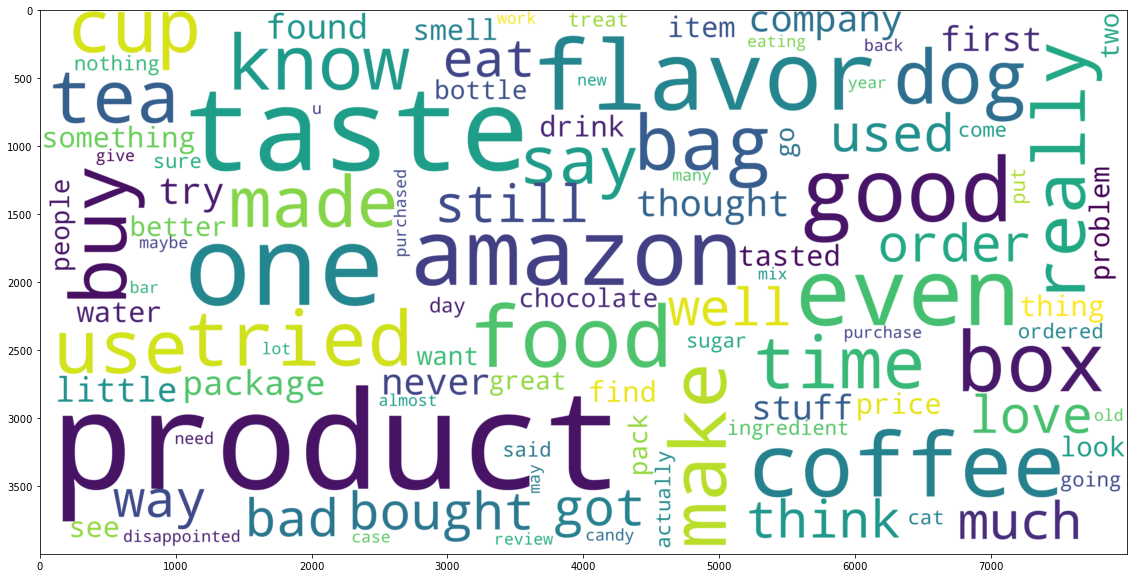

In [37]:
w1 = df1[df1['Score']==1]
wd_text1 = ''.join(w1['lemettized'])
wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(wd_text1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.show()

### Vectorizing the Summaries using CountVectorizer

In [38]:
df3 = df1.copy()
cv = CountVectorizer(binary = True)
cv.fit(df1['lemettized'])
X = cv.transform(df1['lemettized'])
y = df3['Score']

In [39]:
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state = 33,shuffle = True,train_size = 0.75)


### Naive Bayes

In [49]:
## NaiveBayes

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_mnb = mnb.predict(X_test)

print(f'Accuracy score is : {accuracy_score(y_test, y_pred_mnb)}')

Accuracy score is : 0.9042005264965091


In [65]:
cf = confusion_matrix(y_test, y_pred_mnb)
cf

array([[3513,  478],
       [ 359, 4387]])

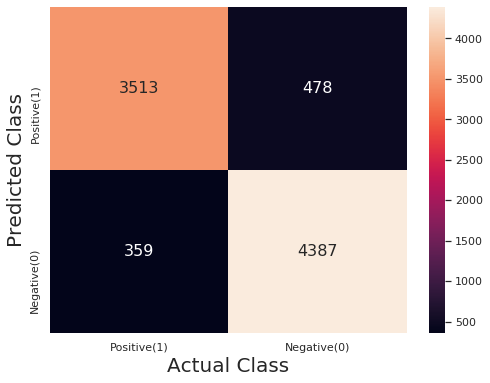

In [66]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

plt.figure(figsize = (8,6))
sns.set(font_scale=1)
sns.heatmap(cf, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

### RandomForestClassifier

In [242]:
from sklearn.ensemble import RandomForestClassifier

In [243]:
rfc = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=42)

In [244]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [246]:
y_pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8932127732631338

### Gradient Boosting

In [249]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier(random_state=42, n_estimators=100,min_samples_split=100)
gbk.fit(X_train, y_train)
gbk_predict = gbk.predict(X_test)
print("Gradient Boosting Score :",accuracy_score(y_test,gbk_predict ))

Gradient Boosting Score : 0.8322078516653314


# 2. Clustering and Hopkins Test

In [1]:
import pandas as pd 
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sagarpy/sagar-py/main/Mall_Customers.csv')

In [3]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.columns = [re.sub('[0-9)($\- ]*', '', col).lower() for col in df.columns]
df = df.drop('customerid',axis = 1)

In [5]:
final_df = pd.get_dummies(df, prefix_sep="_", drop_first=True)
final_df.columns

Index(['age', 'annualincomek', 'spendingscore', 'genre_Male'], dtype='object')

### KMeans Clustering

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

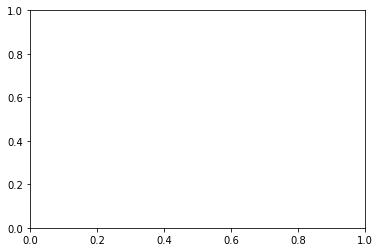

In [9]:
plt.plot(range(1,11), wcss, c='blue')
plt.xlabel('No of Cluster')
plt.ylabel('WCSS')
plt.title('wcss vs no of cluster by using ElBOW method')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3).fit(final_df[['age','annualincomek']])
centroids = kmeans.cluster_centers_
print(centroids)

[[28.36       31.44      ]
 [34.34782609 82.82608696]
 [55.03448276 50.34482759]]


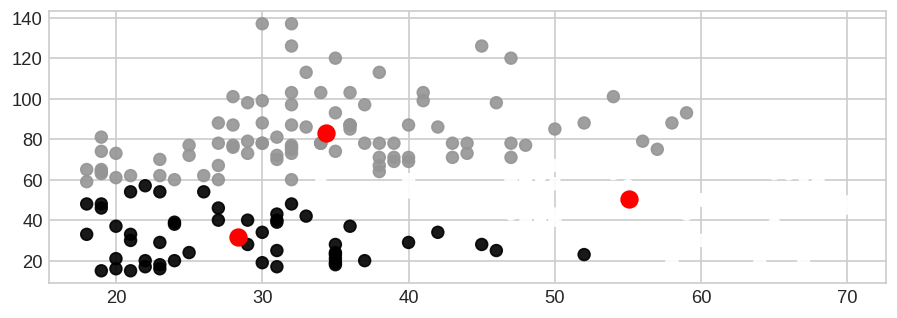

In [171]:
plt.scatter(df['age'], df['annualincomek'], c= kmeans.labels_.astype(float), s=50, alpha=0.9)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100)

[[ 31.95890411  72.95890411]
 [ 29.44680851  29.21276596]
 [ 55.66071429  51.01785714]
 [ 39.         106.5       ]]


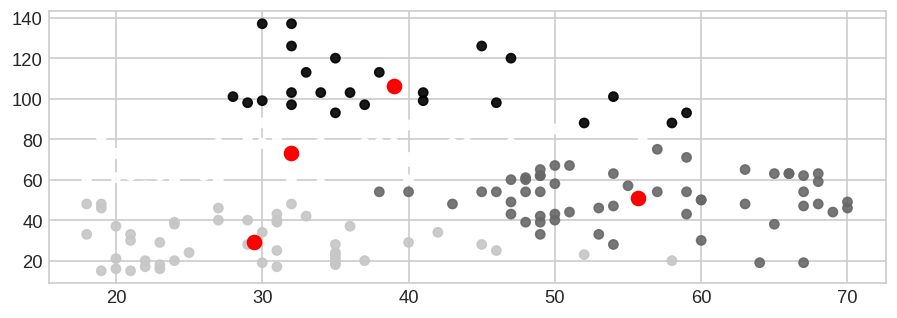

In [172]:
kmeans = KMeans(n_clusters=4).fit(final_df[['age','annualincomek']])
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(df['age'], 
            df['annualincomek'], 
            c= kmeans.labels_.astype(float), 
            s=30,
            alpha=0.9)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=70)

# Hopkins Test

In [175]:
from pyclustertend import hopkins
from sklearn.preprocessing import scale, StandardScaler

In [176]:
X = scale(final_df)

In [177]:
hopkins(X,200)

0.26730911634959253

In [178]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.74307816  0.06431159 -0.79449512  1.12815215]
 [ 0.44680201 -0.10812358 -0.5442077  -0.88640526]
 [-0.77529133  0.04688104  0.88056434  0.03792108]]


In [179]:
kmeans.fit_predict(final_df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [180]:
X = final_df.iloc[0:2]

In [181]:
kmeans.predict(X)

array([0, 0], dtype=int32)

### Hierarchical Clustering

In [182]:
X = StandardScaler().fit_transform(final_df[['age','annualincomek']])

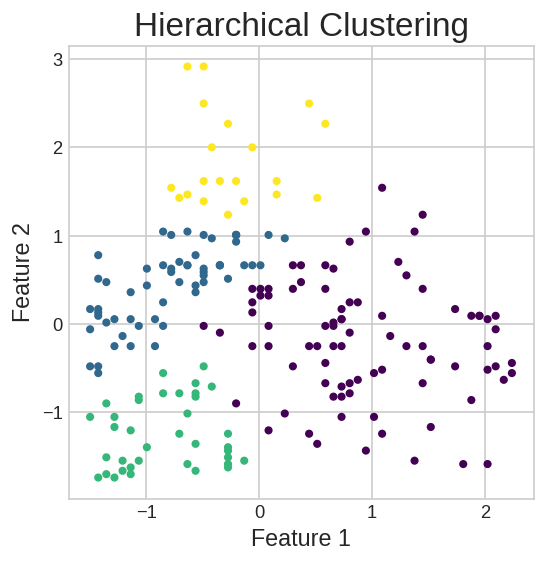

In [183]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(X)

HR_labels = model.labels_
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],c=HR_labels,cmap='viridis',s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

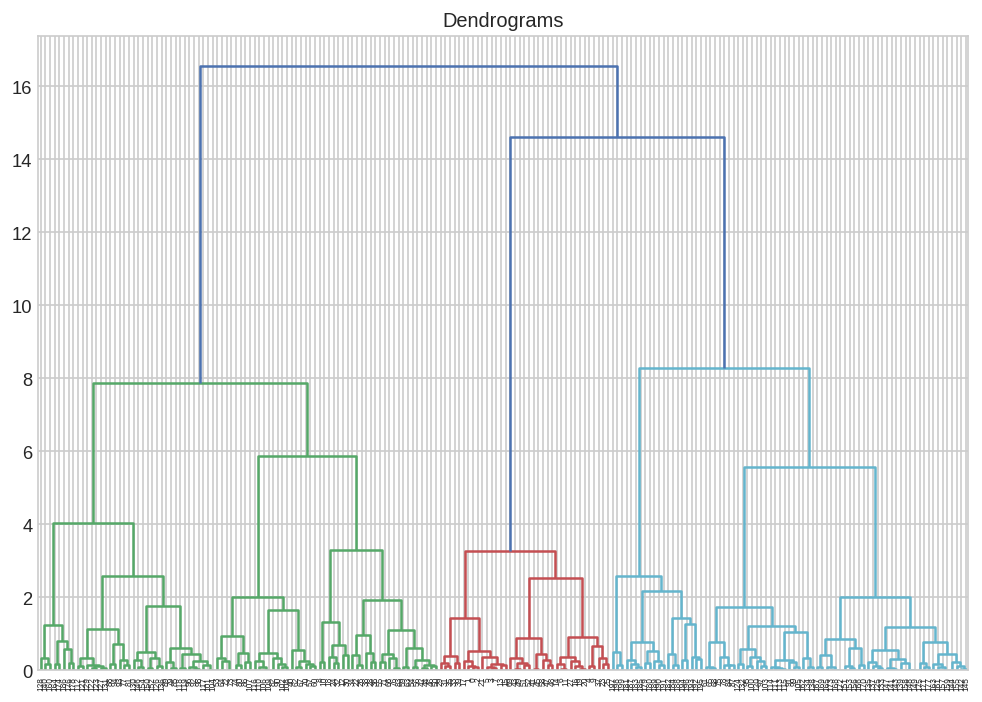

In [184]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

# 3. Association Rule Mining

In [185]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

In [258]:
df = pd.read_csv('https://raw.githubusercontent.com/sagarpy/sagar-py/main/bread%20basket.csv')

In [203]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [204]:
df.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [206]:
# Converting the 'date_time' column into the right format
df['date_time'] = pd.to_datetime(df['date_time'])

In [207]:
df.head(10)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
4,3,Jam,2016-10-30 10:07:00,morning,weekend
5,3,Cookies,2016-10-30 10:07:00,morning,weekend
6,4,Muffin,2016-10-30 10:08:00,morning,weekend
7,5,Coffee,2016-10-30 10:13:00,morning,weekend
8,5,Pastry,2016-10-30 10:13:00,morning,weekend
9,5,Bread,2016-10-30 10:13:00,morning,weekend


In [208]:
# Count of unique customers
df['Transaction'].nunique()

9465

In [209]:
# Extracting date
df['date'] = df['date_time'].dt.date

#Extracting time
df['time'] = df['date_time'].dt.time

# Extracting month and replacing it with text
df['month'] = df['date_time'].dt.month
df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

# Extracting hour
df['hour'] = df['date_time'].dt.hour
# Replacing hours with text
hour_in_num = (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
df['hour'] = df['hour'].replace(hour_in_num, hour_in_obj)

# Extracting weekday and replacing it with text
df['weekday'] = df['date_time'].dt.weekday
df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

# dropping date_time column
df.drop('date_time', axis = 1, inplace = True)

In [210]:
df.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


In [211]:
# cleaning the item column
df['Item'] = df['Item'].str.strip()
df['Item'] = df['Item'].str.lower()

In [212]:
df.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


### Data Visualization on Association Rule Mining

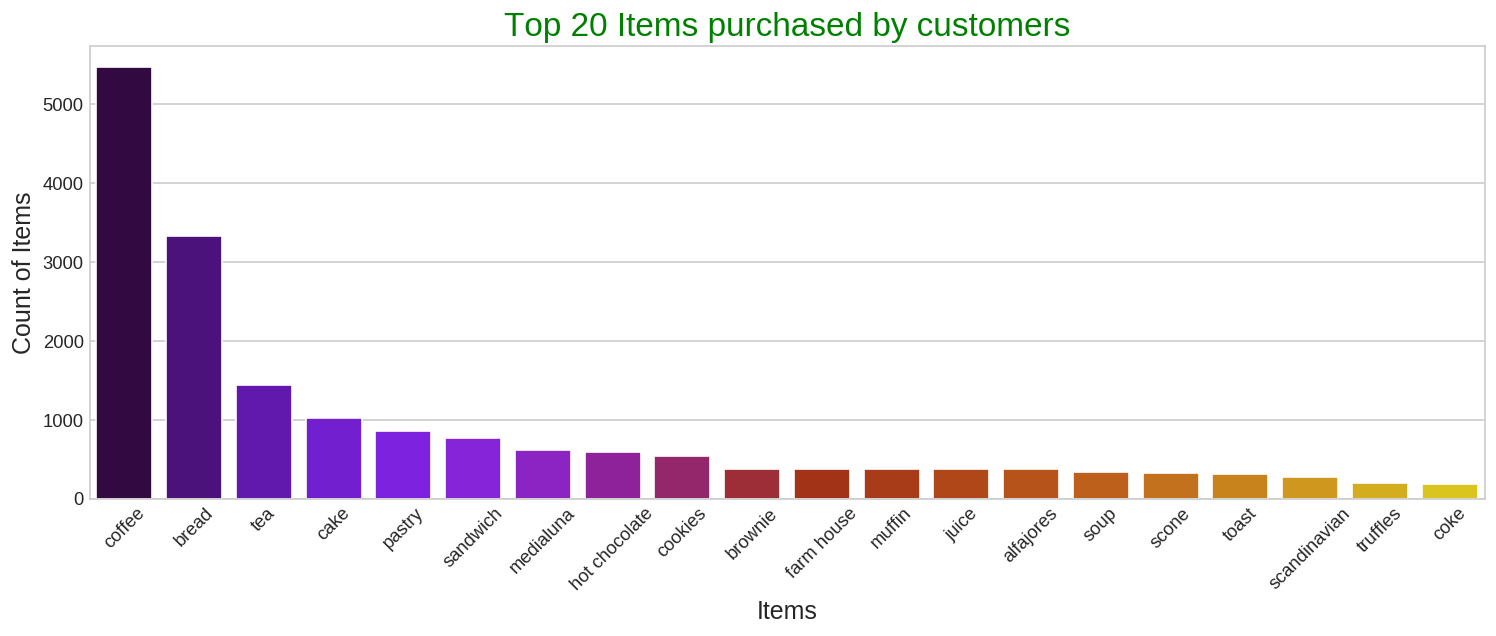

In [213]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()

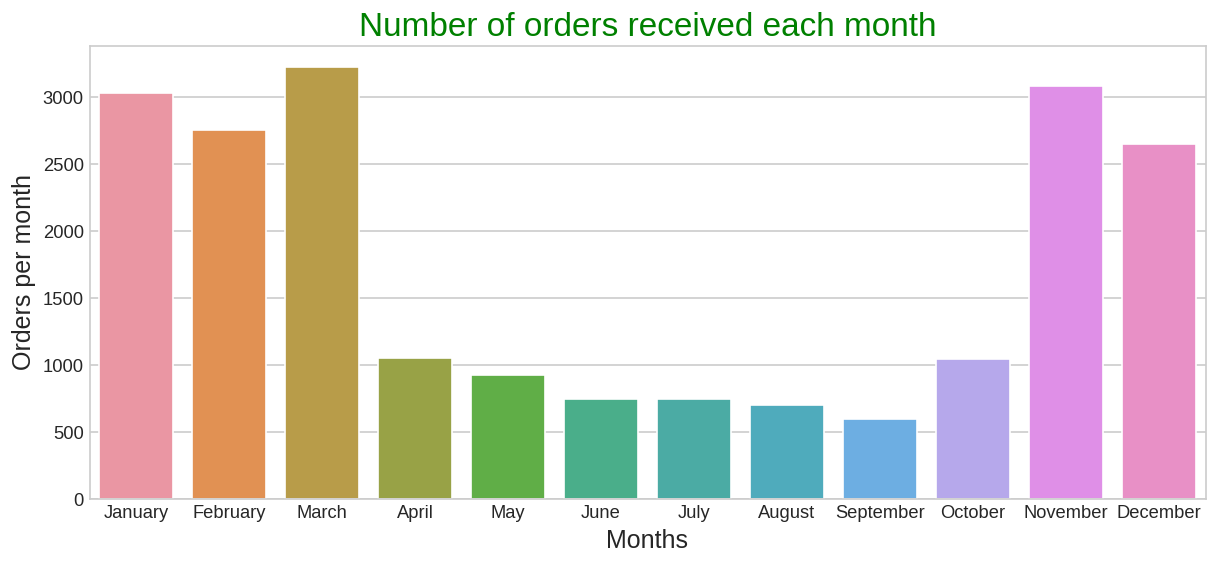

In [214]:
monthTran = df.groupby('month')['Transaction'].count().reset_index()
monthTran.loc[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
monthTran.sort_values("monthorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = monthTran, x = "month", y = "Transaction")
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders received each month', color = 'green', size = 20)
plt.show()


plt.show()

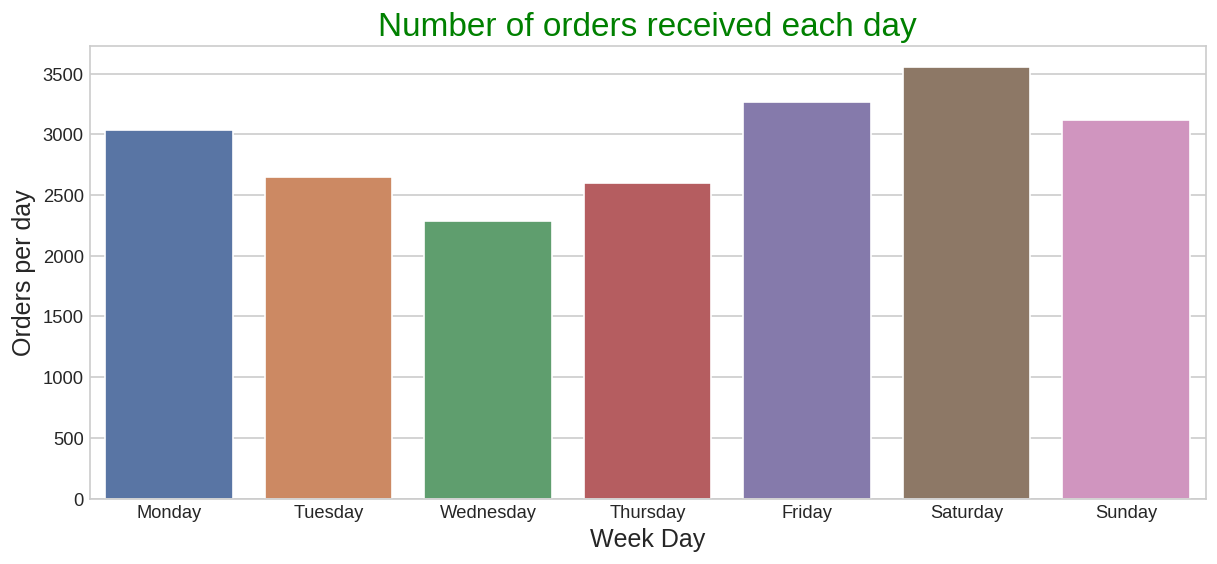

In [215]:
weekTran = df.groupby('weekday')['Transaction'].count().reset_index()
weekTran.loc[:,"weekorder"] = [4,0,5,6,3,1,2]
weekTran.sort_values("weekorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = weekTran, x = "weekday", y = "Transaction")
plt.xlabel('Week Day', size = 15)
plt.ylabel('Orders per day', size = 15)
plt.title('Number of orders received each day', color = 'green', size = 20)
plt.show()


plt.show()

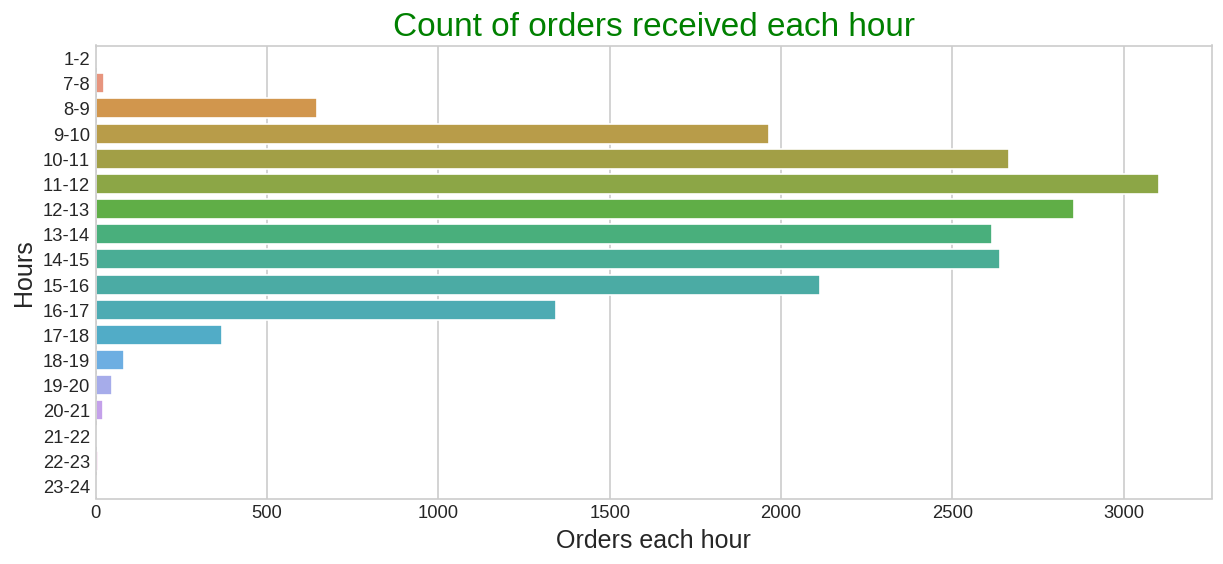

In [216]:
hourTran = df.groupby('hour')['Transaction'].count().reset_index()
hourTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
hourTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = hourTran, x = "Transaction", y = "hour")
plt.ylabel('Hours', size = 15)
plt.xlabel('Orders each hour', size = 15)
plt.title('Count of orders received each hour', color = 'green', size = 20)
plt.show()

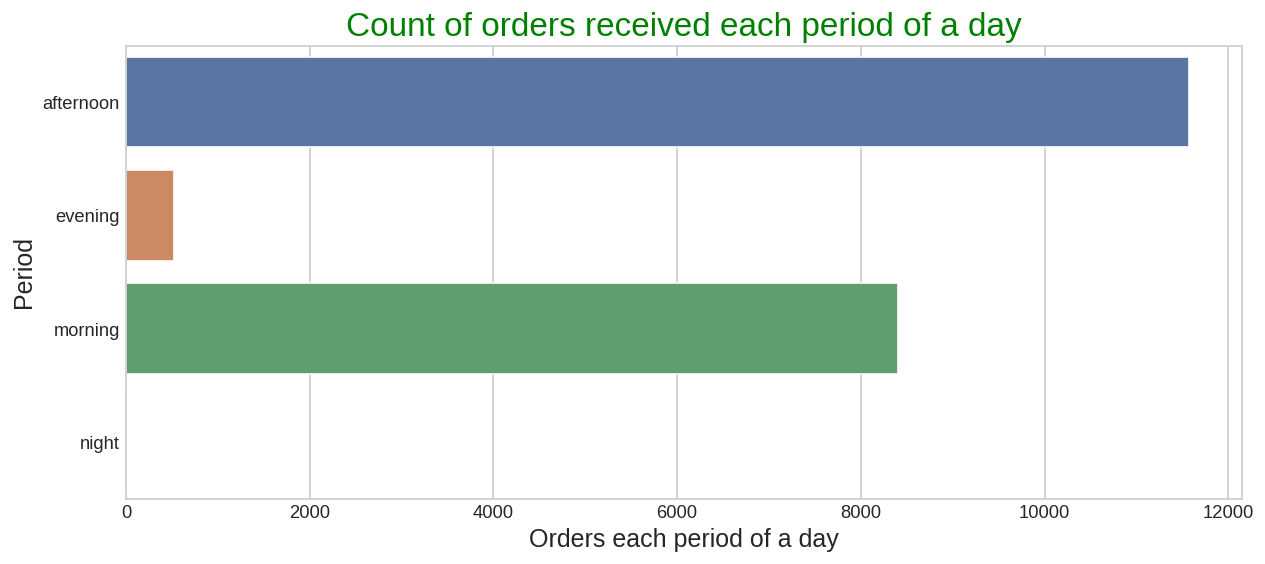

In [217]:
dayTran = df.groupby('period_day')['Transaction'].count().reset_index()
# dayTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
# dayTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = dayTran, x = "Transaction", y = "period_day")
plt.ylabel('Period', size = 15)
plt.xlabel('Orders each period of a day', size = 15)
plt.title('Count of orders received each period of a day', color = 'green', size = 20)
plt.show()

In [218]:
dates = df.groupby('date')['Transaction'].count().reset_index()
dates = dates[dates['Transaction']>=200].sort_values('date').reset_index(drop = True)

dates = pd.merge(dates, df[['date','weekday']], on = 'date', how = 'inner')
dates.drop_duplicates(inplace =True)
dates

,date,Transaction,weekday
0,2016-05-11,275,Wednesday
275,2016-11-19,209,Saturday
484,2016-12-11,221,Sunday
705,2017-01-28,237,Saturday
942,2017-02-18,227,Saturday
1169,2017-03-25,246,Saturday
1415,2017-04-02,292,Sunday
1707,2017-04-03,257,Monday
1964,2017-08-04,205,Friday
2169,2017-11-03,203,Friday


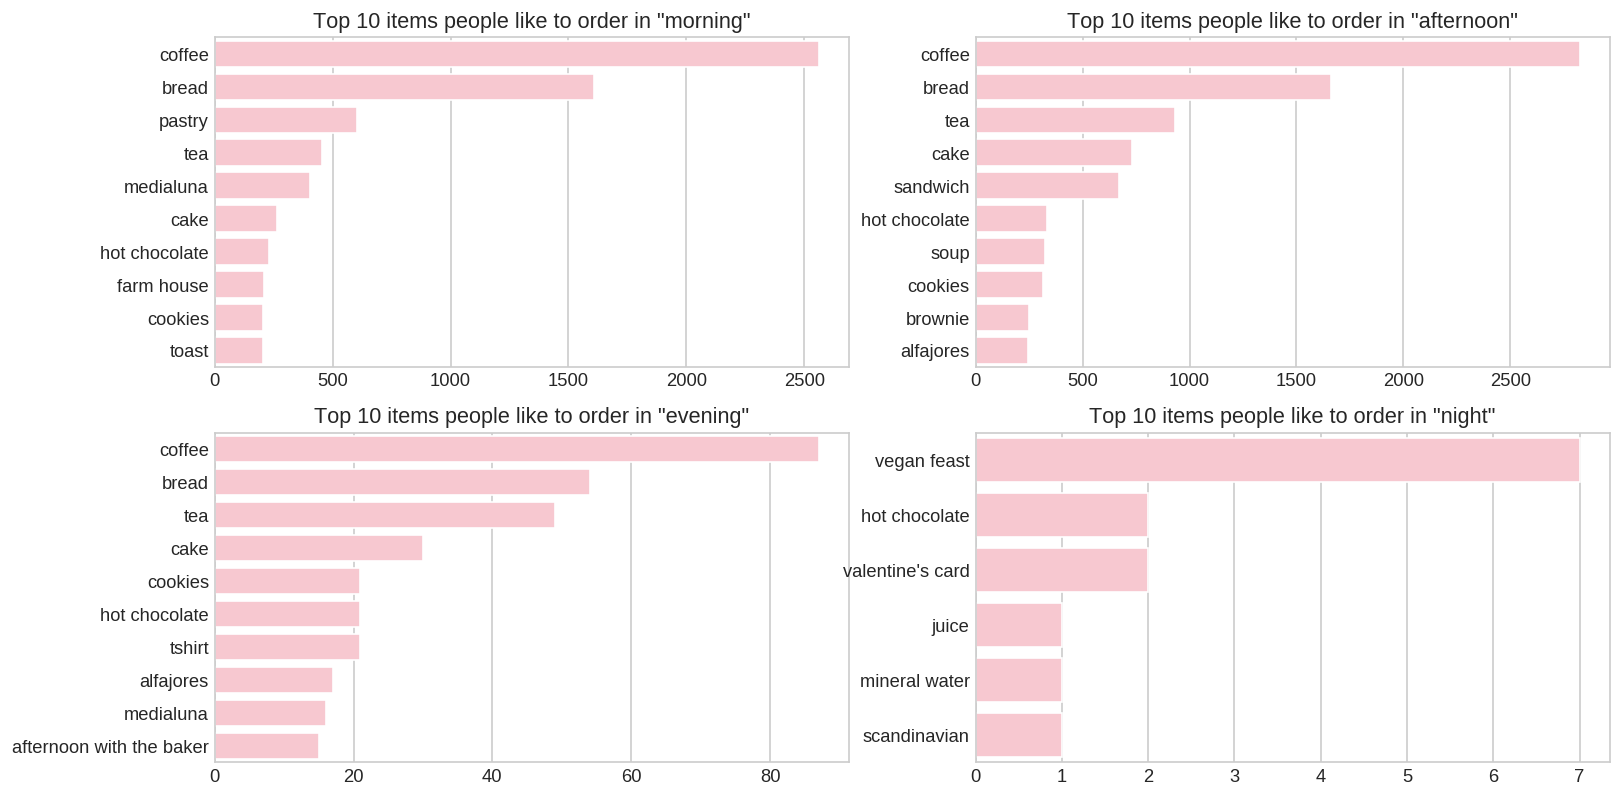

In [219]:
data = df.groupby(['period_day','Item'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)
day = ['morning','afternoon','evening','night']

plt.figure(figsize=(15,8))
for i,j in enumerate(day):
    plt.subplot(2,2,i+1)
    df1 = data[data.period_day==j].head(10)
    sns.barplot(data=df1, y=df1.Item, x=df1.Transaction, color='pink')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Top 10 items people like to order in "{}"'.format(j), size=13)

plt.show()

# Apriori Algorithm

In [220]:
from mlxtend.frequent_patterns import association_rules, apriori

In [221]:
transactions_str = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions_str

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
18882,9682,tacos/fajita,1
18883,9682,tea,1
18884,9683,coffee,1
18885,9683,pastry,1


In [222]:
# making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not
my_basket = transactions_str.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)

In [223]:
my_basket.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [224]:
# making a function which returns 0 or 1
# 0 means item was not in that transaction, 1 means item present in that transaction

def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
# using the 'apriori algorithm' with min_support=0.01 (1% of 9465)
# It means the item should be present in atleast 94 transaction out of 9465 transactions only when we considered that item in
# frequent itemset
frequent_items = apriori(my_basket_sets, min_support = 0.01,use_colnames = True)
frequent_items

,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
...,...,...
56,0.023666,"(toast, coffee)"
57,0.014369,"(tea, sandwich)"
58,0.010037,"(bread, cake, coffee)"
59,0.011199,"(bread, pastry, coffee)"


In [228]:
# now making the rules from frequent itemset generated above

rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
26,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [230]:
# arranging the data from highest to lowest with respect to 'confidence'

rules.sort_values('confidence', ascending=False)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
26,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


# 4.Time Series Analysis

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams
from datetime import datetime
import regex as re

from statsmodels.tsa.statespace.sarimax import SARIMAX
plt.rcParams['figure.figsize'] = (8, 6)
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [73]:
df = pd.read_csv('https://raw.githubusercontent.com/josephofiowa/GA-DSI/master/example-lessons/Intro-to-forecasting/portland-oregon-average-monthly-.csv',parse_dates = ['Month'])


In [74]:
df.rename(columns = {'Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114':'monthly_ridership'},inplace = True)

In [75]:
df.dropna(inplace = True)
df = df.iloc[:114]
df = df.set_index('Month')
df = df['monthly_ridership'].apply(lambda x: int(x))

In [76]:
rid_df = pd.DataFrame(df)

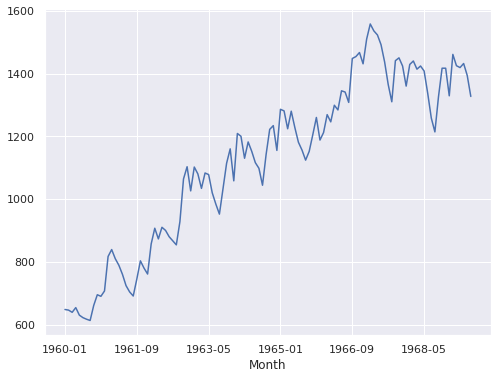

In [77]:
rid_df['monthly_ridership'].plot()

/home/pysagar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 576x432 with 0 Axes>

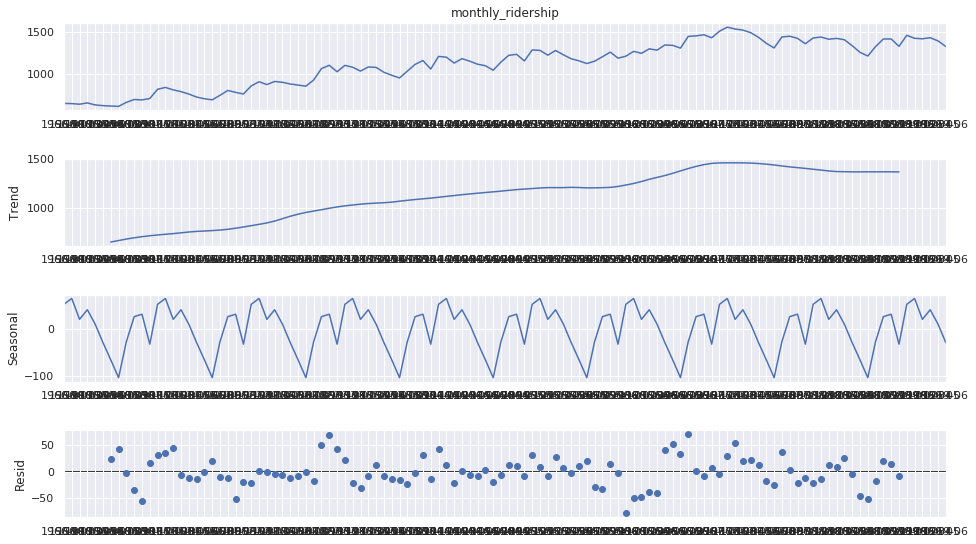

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decomposing Time series
decomposition = seasonal_decompose(rid_df.monthly_ridership, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

### Checking for stationarity

In [79]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
#df1=df.value.dropna()
#print(df1)
result = adfuller(rid_df.monthly_ridership.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.536597
p-value: 0.515336


### Lag Plot for checking autocorrelation

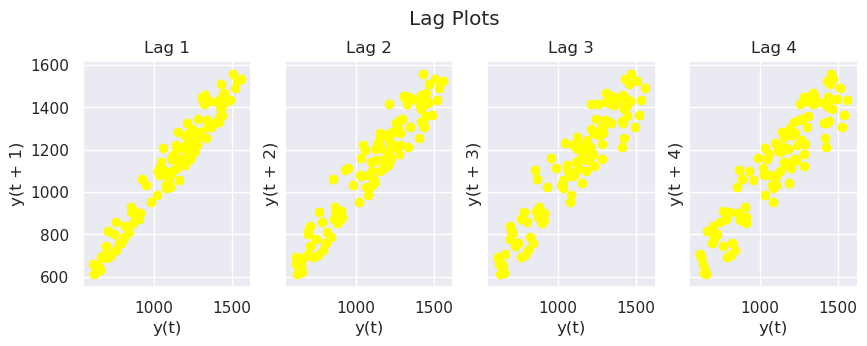

In [97]:
from pandas.plotting import lag_plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(rid_df.monthly_ridership, lag=i+1, ax=ax, c='yellow')
    ax.set_title('Lag ' + str(i+1))
fig.suptitle('Lag Plots ', y=1.05)    
plt.show()

### Autocorrelation Plot and Finding order of q

In [82]:
rid_df= rid_df.reset_index()

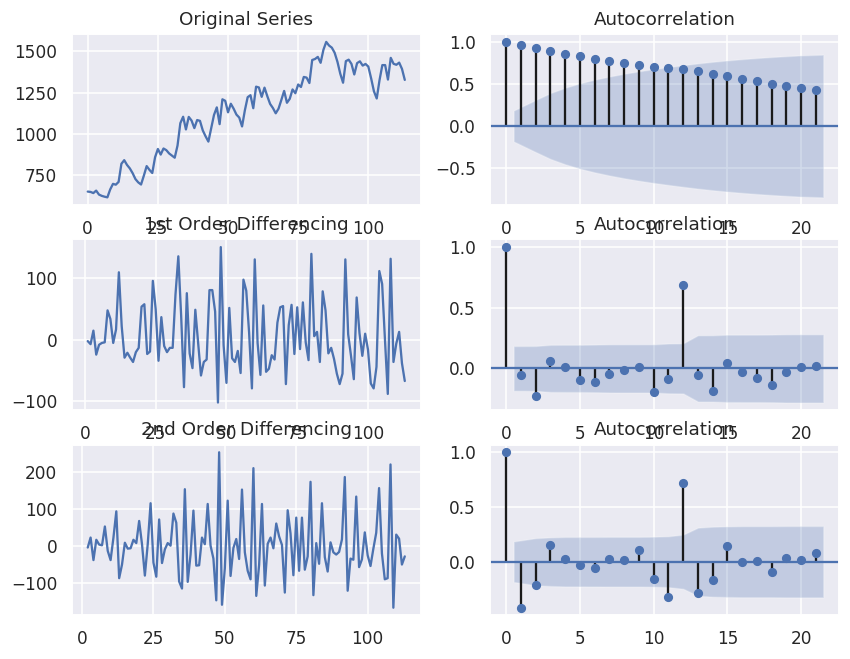

In [83]:
from statsmodels.tsa.stattools import adfuller,acf, pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':110})
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(rid_df['monthly_ridership']); axes[0, 0].set_title('Original Series')
plot_acf(rid_df['monthly_ridership'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(rid_df['monthly_ridership'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(rid_df['monthly_ridership'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(rid_df['monthly_ridership'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(rid_df['monthly_ridership'].diff().diff().dropna(), ax=axes[2, 1])
plt.show()

In [84]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
#df1=df.value.dropna()
#print(df1)
result = adfuller(rid_df['monthly_ridership'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.536597
p-value: 0.515336


In [85]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
#df1=df.value.dropna()
#print(df1)
result = adfuller(rid_df['monthly_ridership'].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.938696
p-value: 0.314082


In [86]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
#df1=df.value.dropna()
#print(df1)
result = adfuller(rid_df['monthly_ridership'].diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -12.478694
p-value: 0.000000


### Finding Order of p term

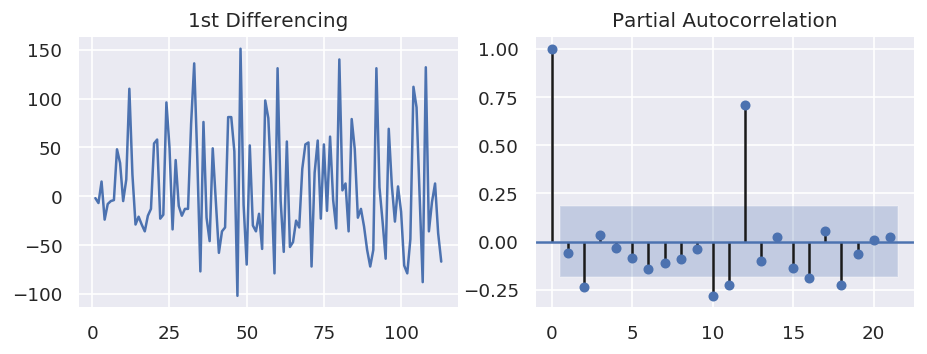

In [87]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(rid_df.monthly_ridership.diff()); axes[0].set_title('1st Differencing')
plot_pacf(rid_df.monthly_ridership.diff().dropna(), ax=axes[1])

plt.show()

# ARIMA modelling

In [88]:
from statsmodels.tsa.arima_model import ARIMA

#ARIMA Model
model = ARIMA(rid_df.monthly_ridership, order=(1,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D2.monthly_ridership   No. Observations:                  112
Model:                   ARIMA(1, 2, 1)   Log Likelihood                -613.438
Method:                         css-mle   S.D. of innovations             56.633
Date:                  Sun, 13 Jun 2021   AIC                           1234.876
Time:                          20:39:37   BIC                           1245.750
Sample:                               2   HQIC                          1239.288
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.1249      0.155     -0.805      0.421      -0.429       0.179
ar.L1.D2.monthly_ridership    -0.0547      0.095     -0.577      0.

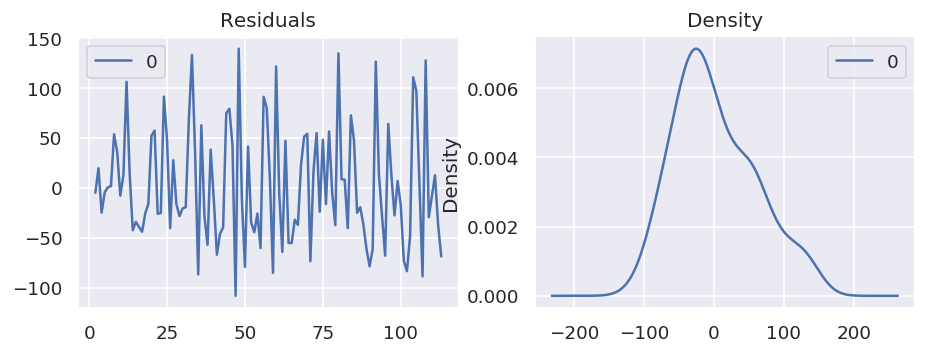

In [89]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

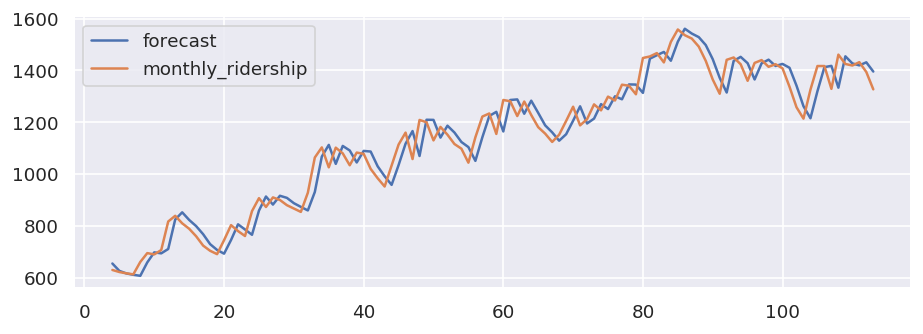

In [90]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [91]:
from statsmodels.tsa.stattools import acf
# Create Training and Test
train = rid_df.monthly_ridership[:70]
test = rid_df.monthly_ridership[70:]

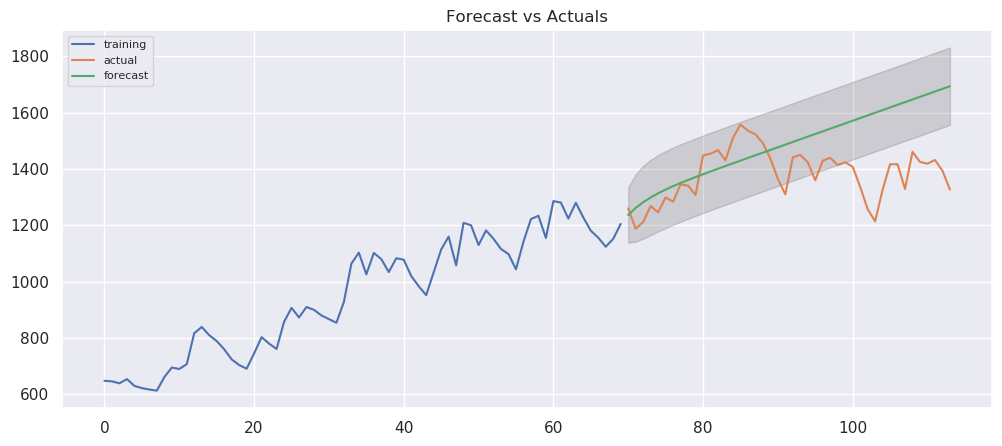

In [92]:
# Build Model
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(44, alpha=0.05)  # 95% conf
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [93]:
import numpy as np
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    return({'mape':mape})

forecast_accuracy(fc, test.values)

{'mape': 0.09877794239109085}

### Auto SARIMA Forecast in Python

In [94]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import pandas as pd


model_arima= pm.auto_arima(rid_df.monthly_ridership,
                           trace=True, 
                           error_action='ignore', 
                           test='adf',
                           start_p=1,
                           start_q=1,
                           max_p=5,
                           max_q=5,
                           d=None,
                           suppress_warnings=True,
                           stepwise=True,
                           seasonal=True,
                           D=2,
                           start_P=0,
                           max_P=2,
                           start_Q=0,
                           max_Q=2, 
                           m=12)
print(model_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,2,0)[12]             : AIC=1000.535, Time=0.30 sec
 ARIMA(0,0,0)(0,2,0)[12]             : AIC=1174.617, Time=0.03 sec
 ARIMA(1,0,0)(1,2,0)[12]             : AIC=971.618, Time=0.40 sec
 ARIMA(0,0,1)(0,2,1)[12]             : AIC=1046.943, Time=1.06 sec
 ARIMA(1,0,0)(0,2,0)[12]             : AIC=1003.589, Time=0.05 sec
 ARIMA(1,0,0)(2,2,0)[12]             : AIC=962.389, Time=0.82 sec
 ARIMA(1,0,0)(2,2,1)[12]             : AIC=inf, Time=1.77 sec
 ARIMA(1,0,0)(1,2,1)[12]             : AIC=inf, Time=0.89 sec
 ARIMA(0,0,0)(2,2,0)[12]             : AIC=1128.966, Time=0.33 sec
 ARIMA(2,0,0)(2,2,0)[12]             : AIC=964.059, Time=0.64 sec
 ARIMA(1,0,1)(2,2,0)[12]             : AIC=964.073, Time=1.26 sec
 ARIMA(0,0,1)(2,2,0)[12]             : AIC=1049.777, Time=1.81 sec
 ARIMA(2,0,1)(2,2,0)[12]             : AIC=961.092, Time=2.57 sec
 ARIMA(2,0,1)(1,2,0)[12]             : AIC=969.621, Time=1.08 sec
 ARIMA(2,0,1)(2,2,1)[12]           

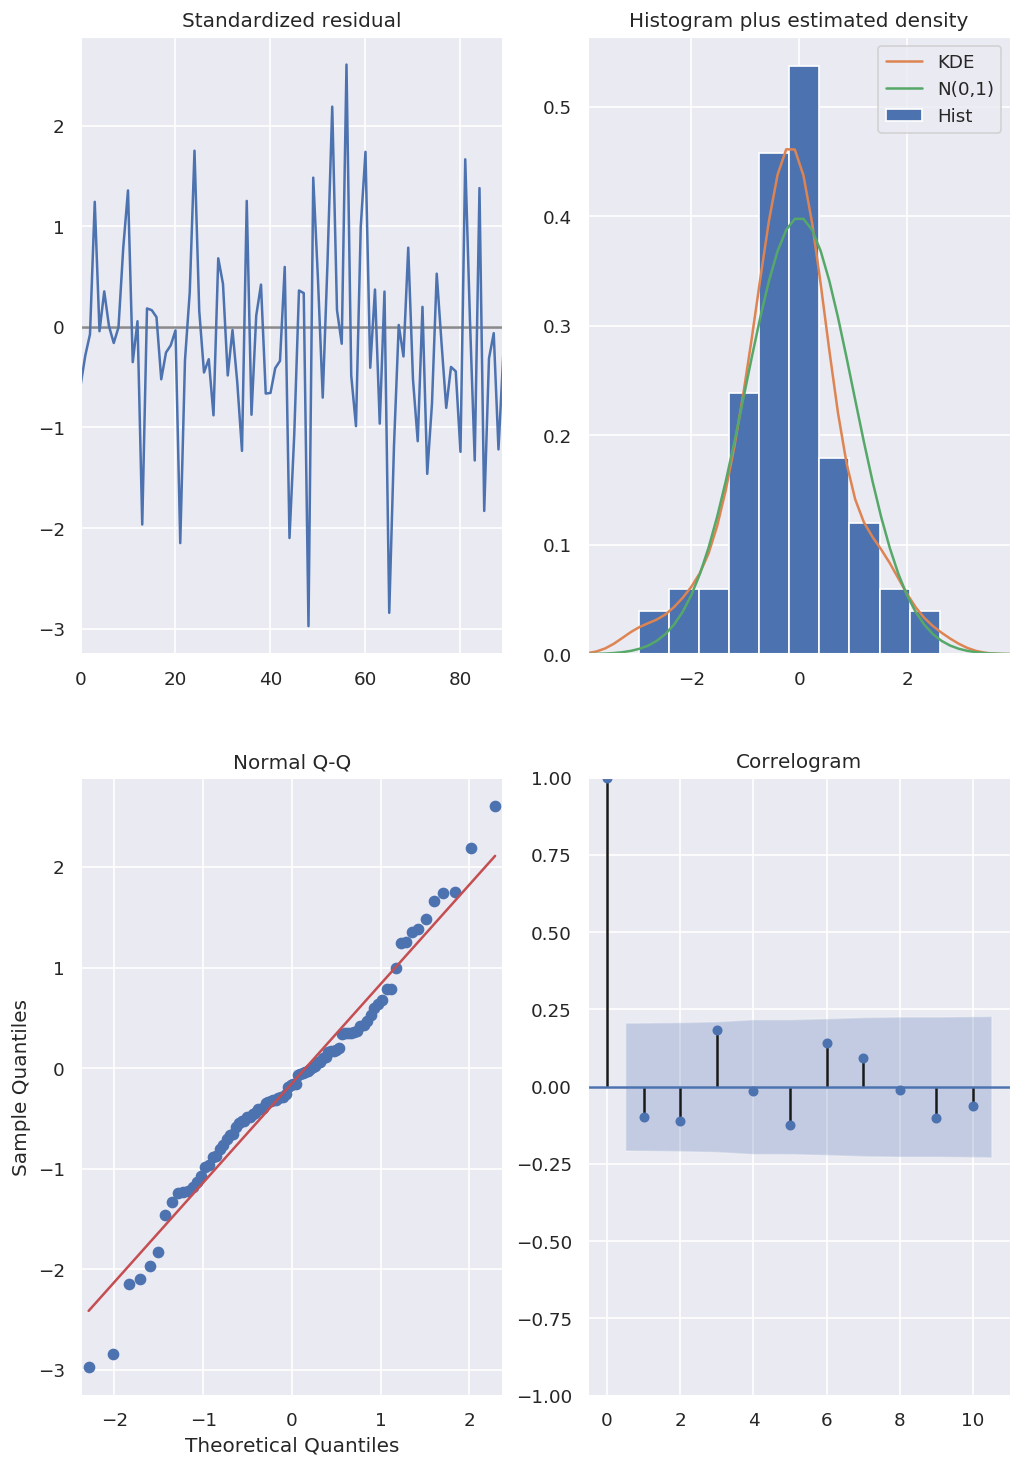

In [95]:

model_arima.plot_diagnostics(figsize=(10,15))
plt.show()

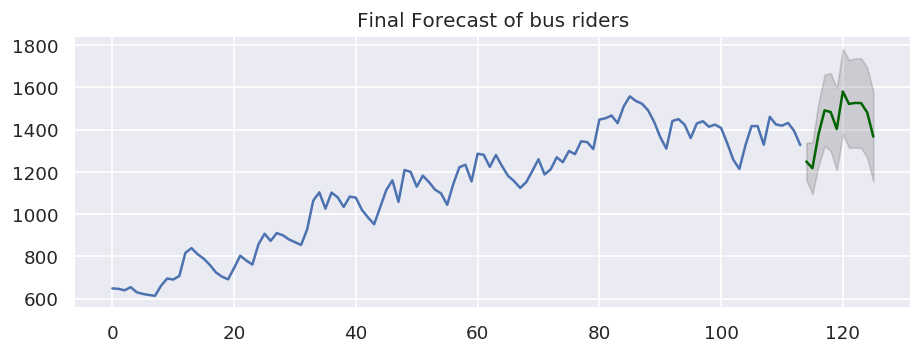

In [96]:
# Forecast
n_periods = 12
fc, confint = model_arima.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(rid_df.monthly_ridership), len(rid_df.monthly_ridership)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(rid_df.monthly_ridership)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of bus riders")
plt.show()

# 5. RECOMMENDER SYSTEM

In [257]:
# Import Pandas
import pandas as pd

# Loading Data sets
#full_url='/home/pysagar/Desktop/tmdb_5000_credits.csv'
full_url='https://raw.githubusercontent.com/sagarpy/sagar-py/main/tmdb_5000_creditss.csv'
full_url1='https://raw.githubusercontent.com/sagarpy/sagar-py/main/tmdb_5000_movies.csv'

credits = pd.read_csv(full_url)
movies=pd.read_csv(full_url1)

In [99]:
# Printing 1st 5 elements of credits dataset
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [100]:
# Printing 1st 5 elements of movies dataset
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [101]:
# Printing the shapes of both the datasets
print("Credits:",credits.shape)
print("Movies:",movies.shape)

Credits: (4803, 4)
Movies: (4803, 20)


In [102]:
# Renaming the column of credits data set
credits_renamed=credits.rename(index=str,columns={'movie_id':'id'})
credits_renamed.head()

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [103]:
# Merging both data sets
merge=movies.merge(credits_renamed,on='id')
merge.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [105]:
# Dropping unnecessary columns 
cleaned=merge.drop(columns=['homepage','title_x','title_y','status','production_countries'])
cleaned.head(5)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [106]:
cleaned['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

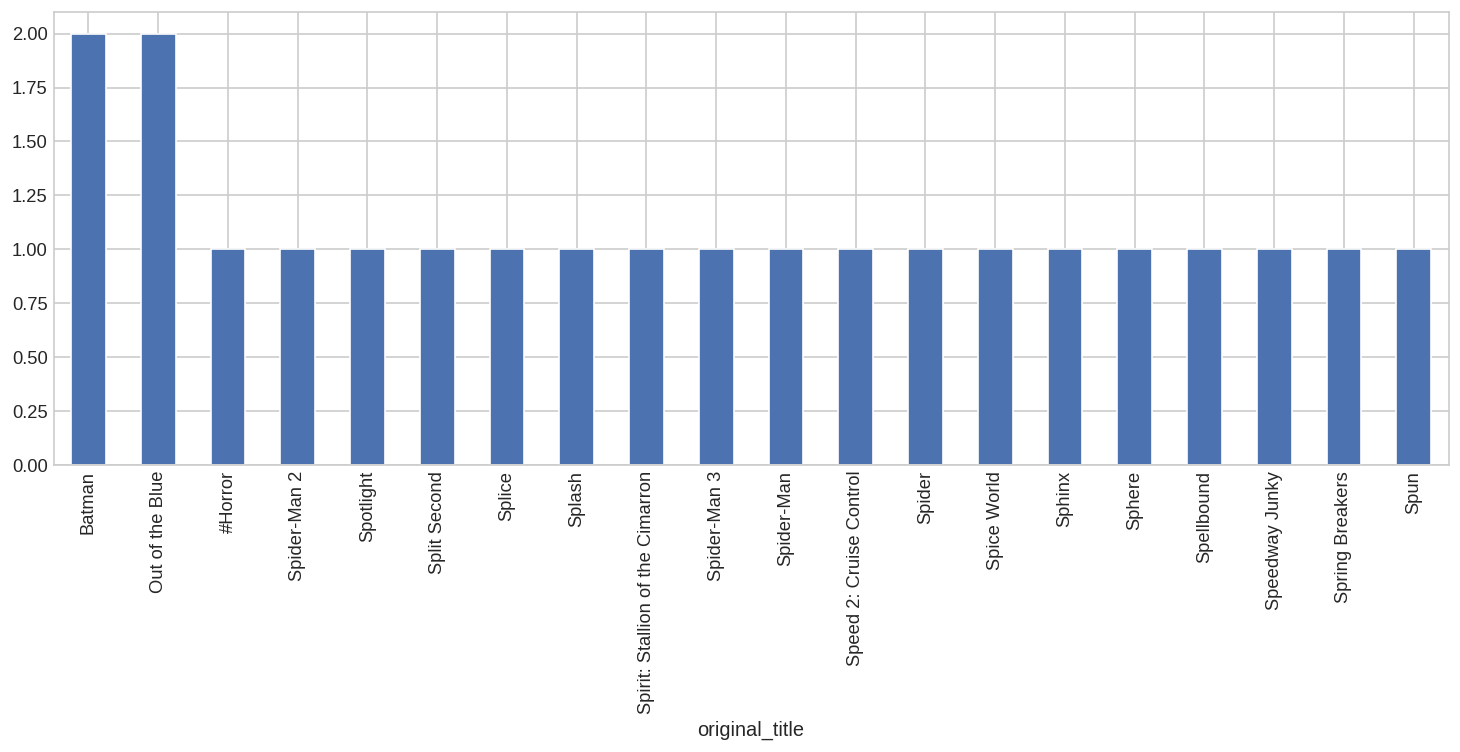

In [124]:
most_rated_fig= cleaned.groupby('original_title')['vote_average'].count().sort_values(ascending=False).head(20)

plt.figure(figsize=(15,5))

plt.style.use('seaborn-whitegrid')
most_rated_fig.plot(kind="bar")

In [107]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,3),min_df=3,analyzer='word')

#Replace NaN with an empty string
cleaned['overview'] = cleaned['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(cleaned['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 9919)

In [108]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [109]:
print(cosine_sim.shape)
print(cosine_sim[1])

(4803, 4803)
[0.         1.         0.         ... 0.02445021 0.         0.        ]


In [110]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(cleaned.index, index=cleaned['original_title']).drop_duplicates()

In [111]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return cleaned['original_title'].iloc[movie_indices]

In [112]:
# Getting the recommendation
get_recommendations('Avatar')

1341                Obitaemyy Ostrov
634                       The Matrix
3604                       Apollo 18
2130                    The American
775                        Supernova
529                 Tears of the Sun
151                          Beowulf
311     The Adventures of Pluto Nash
847                         Semi-Pro
570                           Ransom
Name: original_title, dtype: object

In [113]:
get_recommendations('The Dark Knight Rises')

299                              Batman Forever
65                              The Dark Knight
1359                                     Batman
428                              Batman Returns
2507                                  Slow Burn
119                               Batman Begins
1181                                        JFK
3854    Batman: The Dark Knight Returns, Part 2
9            Batman v Superman: Dawn of Justice
210                              Batman & Robin
Name: original_title, dtype: object

# Visualisation on Recommender Systems

In [255]:
dataset = pd.read_csv('https://raw.githubusercontent.com/sagarpy/sagar-py/main/MoviesOnStreamingPlatforms_updated.csv')

In [256]:
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [134]:
dataset.columns


Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [141]:
# to seperate genre column in dataset
seperated_genres = dataset['Genres'].str.get_dummies(',')

# to concatenate two dataframes
dataset = pd.concat([dataset, seperated_genres], axis = 1, sort = False)

In [142]:
# seperating movies viewing platforms

netflix_movies = dataset.loc[dataset['Netflix'] == 1]
hulu_movies = dataset.loc[dataset['Hulu'] == 1]
prime_video_movies = dataset.loc[dataset['Prime Video'] == 1]
disney_movies = dataset.loc[dataset['Disney+'] == 1]

In [143]:
# dropping columns of other movies watching platforms and unnecessary columns

netflix_movies = netflix_movies.drop(['Hulu', 'Prime Video', 'Disney+', 'Type', 'Unnamed: 0','Genres'], axis = 1)
hulu_movies = hulu_movies.drop(['Netflix', 'Prime Video', 'Disney+', 'Type', 'Unnamed: 0','Genres'], axis = 1)
prime_video_movies = prime_video_movies.drop(['Hulu', 'Netflix', 'Disney+', 'Type', 'Unnamed: 0','Genres'], axis = 1)
disney_movies = disney_movies.drop(['Hulu', 'Prime Video', 'Netflix', 'Type', 'Unnamed: 0','Genres'], axis = 1)

In [145]:
disney_movies.head(3)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Disney+,Directors,Country,Language,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
95,96,Saving Mr. Banks,2013,13+,7.5,79%,1,John Lee Hancock,"United States,United Kingdom,Australia",English,...,0,0,0,0,0,0,0,0,0,0
103,104,Amy,2015,18+,7.8,95%,1,NaN,United States,English,...,0,0,0,0,0,0,0,0,0,0
122,123,Bolt,2008,7+,6.8,89%,1,"Byron Howard,Chris Williams",United States,English,...,0,0,0,0,0,0,0,0,0,0


In [146]:
index_netflix = netflix_movies.index
total_netflix_movies = len(index_netflix)

index_hulu = hulu_movies.index
total_hulu_movies = len(index_hulu)

index_prime = prime_video_movies.index
total_prime_movies = len(index_prime)

index_disney = disney_movies.index
total_disney_movies = len(index_disney)

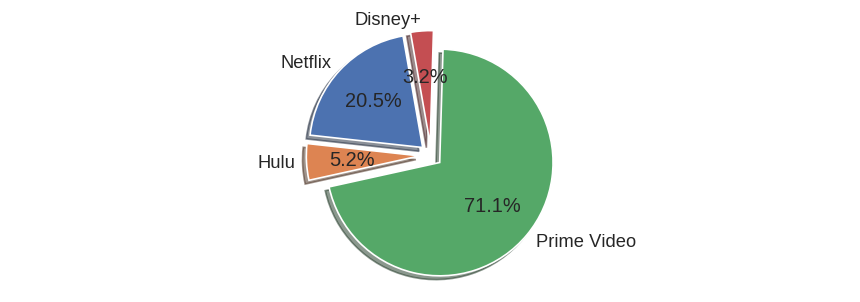

In [147]:
# Pie chart showing platforms with most number of the movies 

labels = 'Netflix' , 'Hulu', 'Prime Video', 'Disney+'
sizes = [total_netflix_movies,total_hulu_movies,total_prime_movies,total_disney_movies]
explode = (0.1, 0.1, 0.1, 0.1 )

fig1 , ax1 = plt.subplots()

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 100)

ax1.axis ('equal')
plt.show()

In [148]:

netflix_movies['time'] = netflix_movies['Runtime']
netflix_movies['screenplay'] = netflix_movies['time']/60

hulu_movies['time'] = hulu_movies['Runtime']
hulu_movies['screenplay'] = hulu_movies['time'] / 60

prime_video_movies['time'] = prime_video_movies['Runtime']
prime_video_movies['screenplay'] = prime_video_movies['time'] / 60

disney_movies['time'] = disney_movies['Runtime']
disney_movies['screenplay'] = disney_movies['time'] / 60


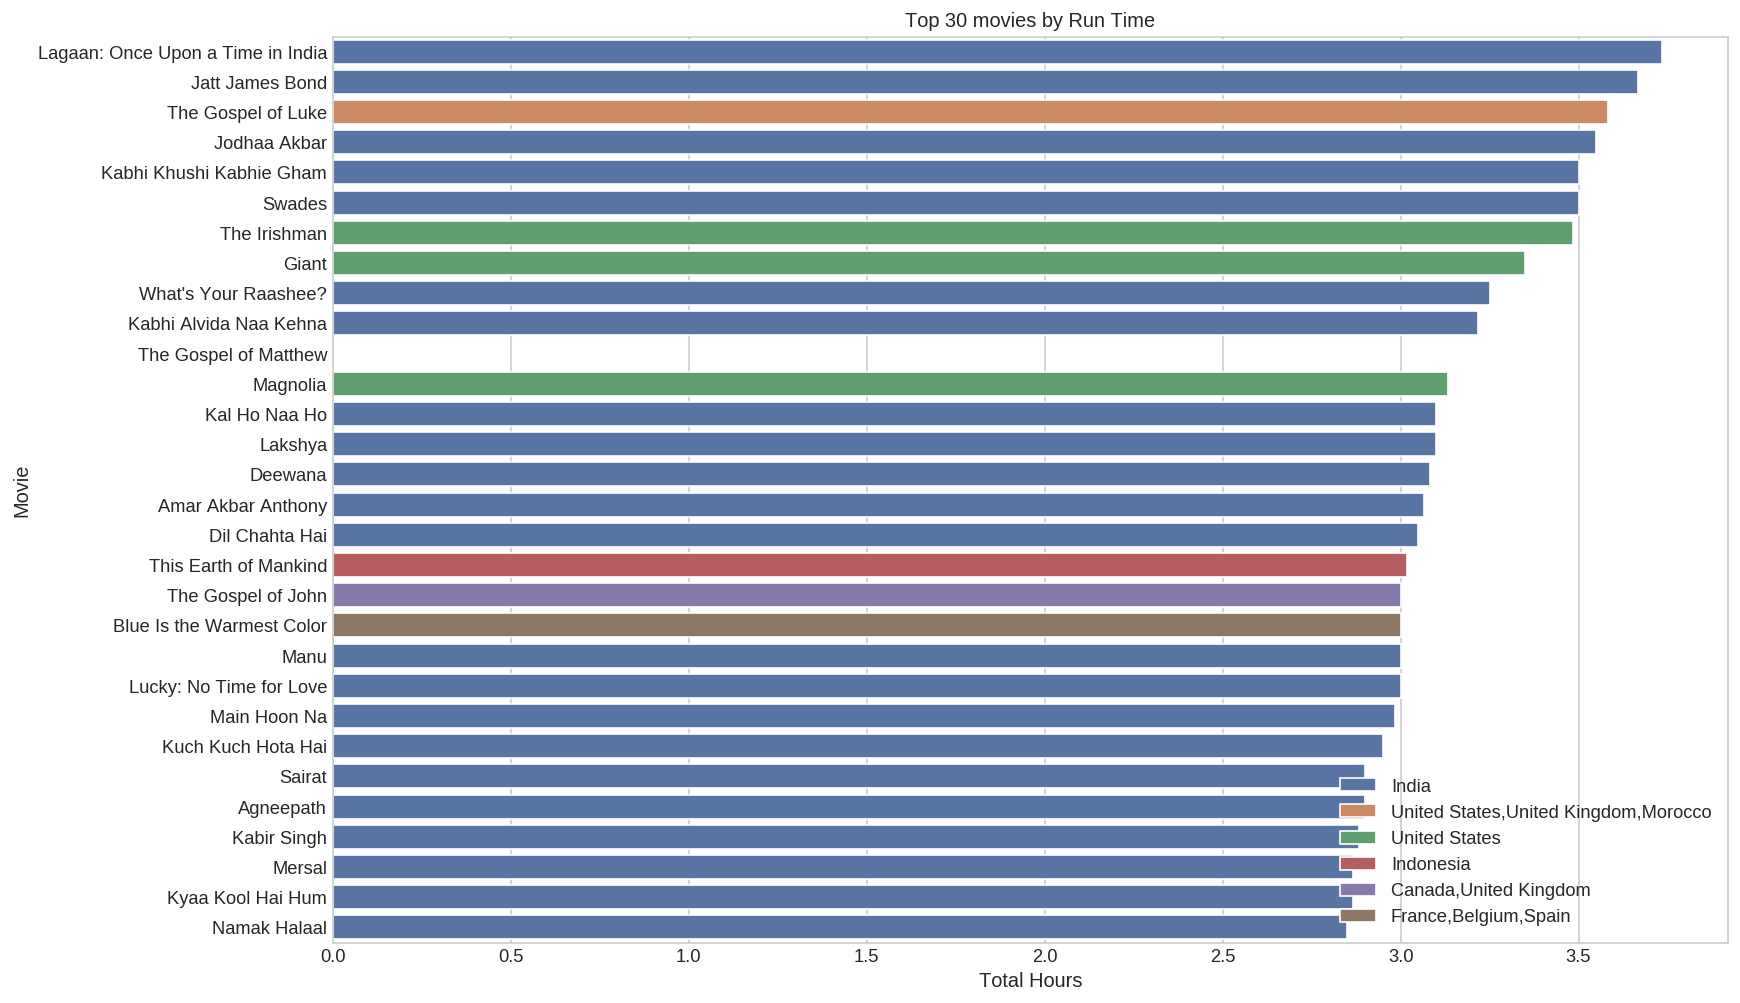

In [149]:
# top 30 runtime movies on Netflix 

top_30_screenplay = netflix_movies.sort_values(by = 'screenplay', ascending = False).head(30)

plt.figure(figsize = (15, 10))
sns.barplot(data = top_30_screenplay, y = 'Title', x = 'screenplay', hue = 'Country', dodge = False)
plt.legend(loc = 'lower right')
plt.xlabel('Total Hours')
plt.ylabel('Movie')
plt.title('Top 30 movies by Run Time')

plt.show()


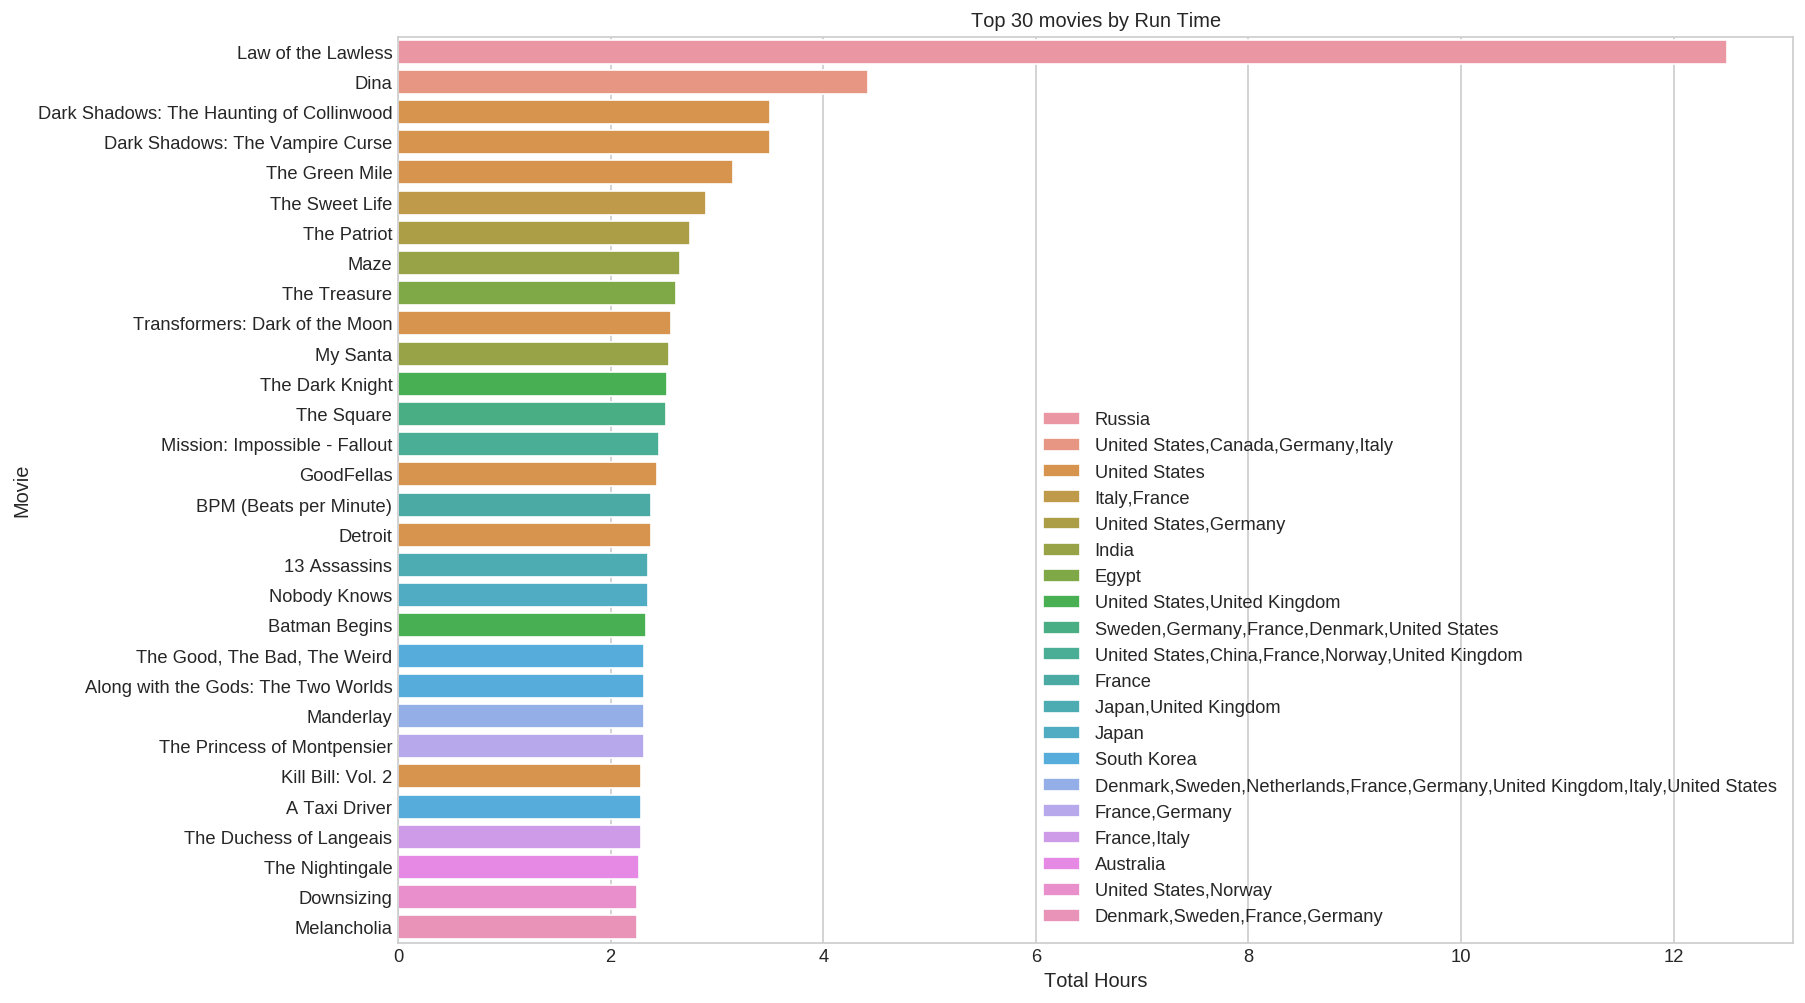

In [150]:
# top 30 runtime movies on Hulu
top_30_screenplay = hulu_movies.sort_values(by = 'screenplay', ascending = False).head(30)
plt.figure(figsize = (15, 10))
sns.barplot(data = top_30_screenplay, y = 'Title', x = 'screenplay', hue = 'Country', dodge = False)
plt.legend(loc = 'lower right')
plt.xlabel('Total Hours')
plt.ylabel('Movie')
plt.title('Top 30 movies by Run Time')
plt.show()

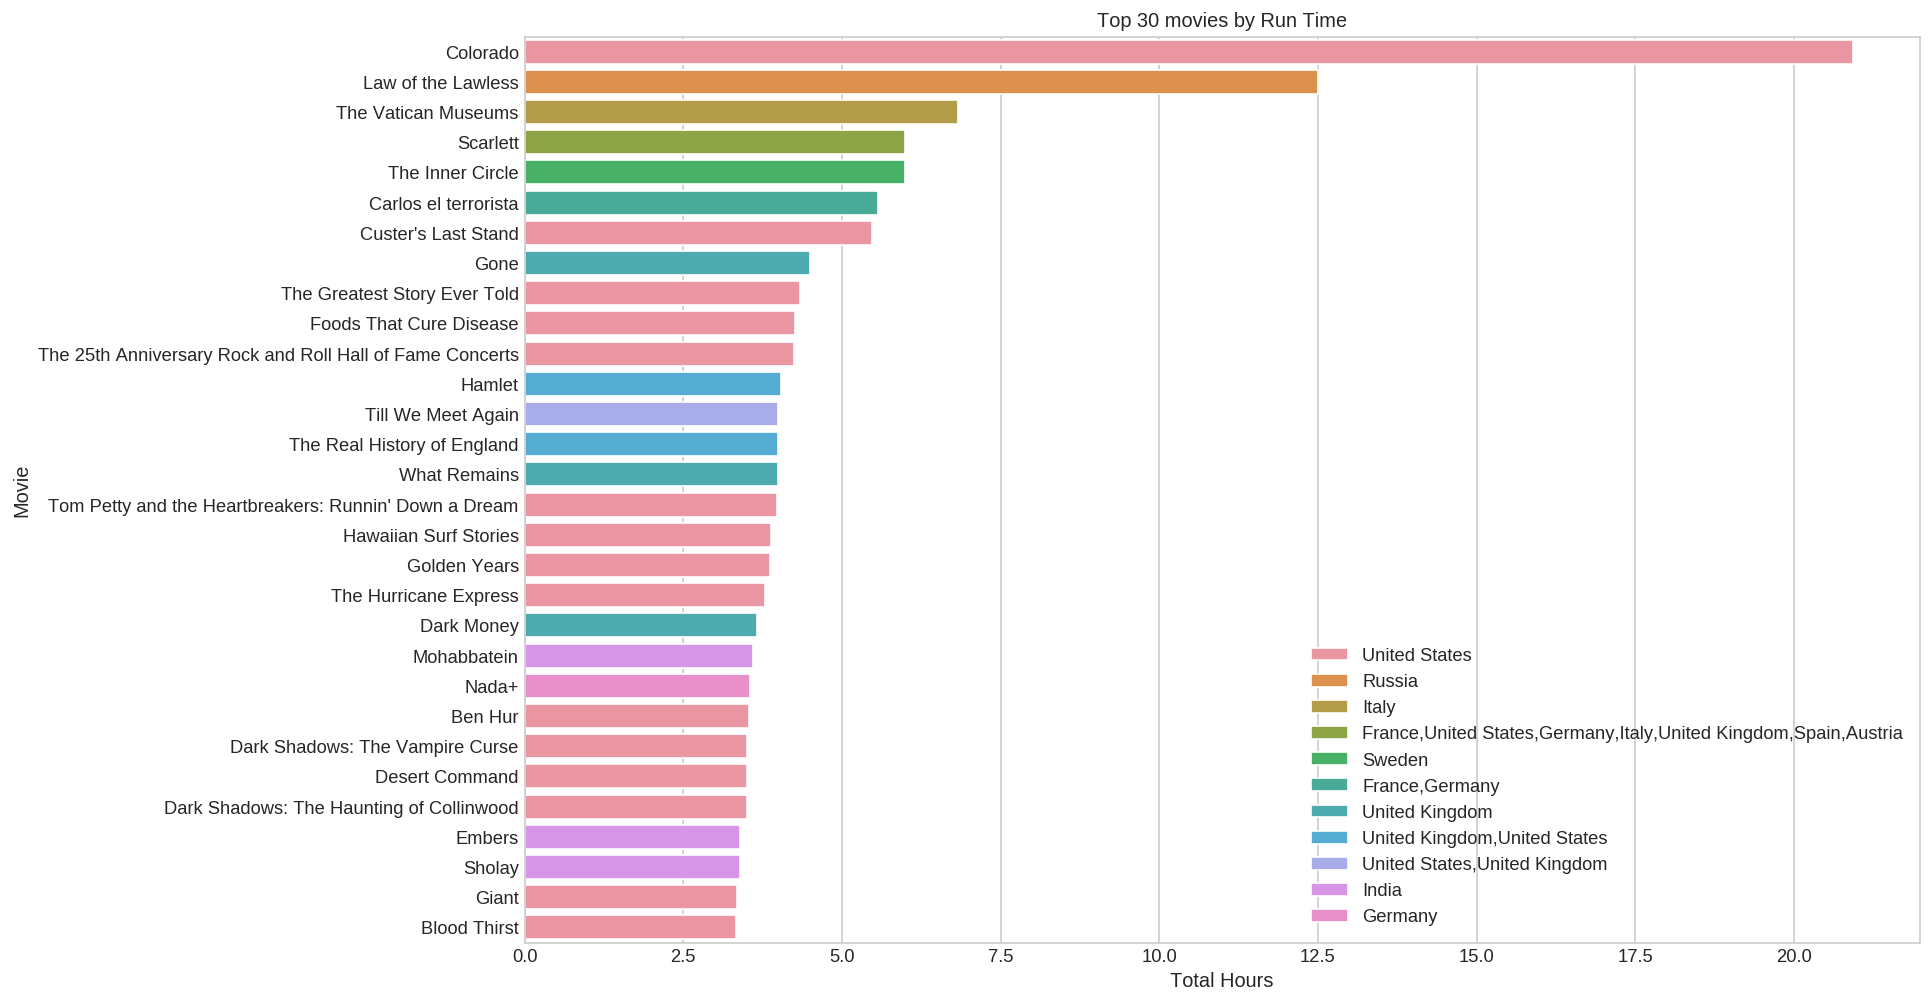

In [151]:
# top 30 runtime movies on Amazon Prime Video

top_30_screenplay = prime_video_movies.sort_values(by = 'screenplay', ascending = False).head(30)

plt.figure(figsize = (15, 10))
sns.barplot(data = top_30_screenplay, y = 'Title', x = 'screenplay', hue = 'Country', dodge = False)
plt.legend(loc = 'lower right')
plt.xlabel('Total Hours')
plt.ylabel('Movie')
plt.title('Top 30 movies by Run Time')
plt.show()

In [152]:
# streaming platform with most movies above 8+ rating (IMDb)
rate_mov_net = netflix_movies['IMDb'] > 8
print("Total Movies on Netflix with more than 8+ rating(IMDb) :",rate_mov_net.sum())

Total Movies on Netflix with more than 8+ rating(IMDb) : 129


In [153]:
rate_mov_dis = disney_movies['IMDb'] > 8
print("Total Movies on Disney+ with more than 8+ rating(IMDb) :",rate_mov_dis.sum())

Total Movies on Disney+ with more than 8+ rating(IMDb) : 21


In [154]:
rate_mov_pvm = prime_video_movies['IMDb'] > 8
print("Total Movies on amazon prime video with more than 8+ rating(IMDb) :",rate_mov_pvm.sum())

Total Movies on amazon prime video with more than 8+ rating(IMDb) : 324


In [155]:
rate_mov_hulu = hulu_movies['IMDb'] > 8
print("Total Movies on Hulu with more than 8+ rating(IMDb) :",rate_mov_hulu.sum())

Total Movies on Hulu with more than 8+ rating(IMDb) : 23


In [156]:
top_rated = [rate_mov_net.sum(),rate_mov_dis.sum(),rate_mov_pvm.sum(),rate_mov_hulu.sum()]
top_plat = ['Netflix', 'Disney', 'Prime Video', 'Hulu']

In [157]:
top_rated_data = pd.DataFrame({
    'platforms' : ['Netflix', 
                   'Disney', 
                   'Prime Video', 
                   'Hulu'],
    'total_mov' : [rate_mov_net.sum(),
                   rate_mov_dis.sum(),
                   rate_mov_pvm.sum(),
                   rate_mov_hulu.sum()]
})

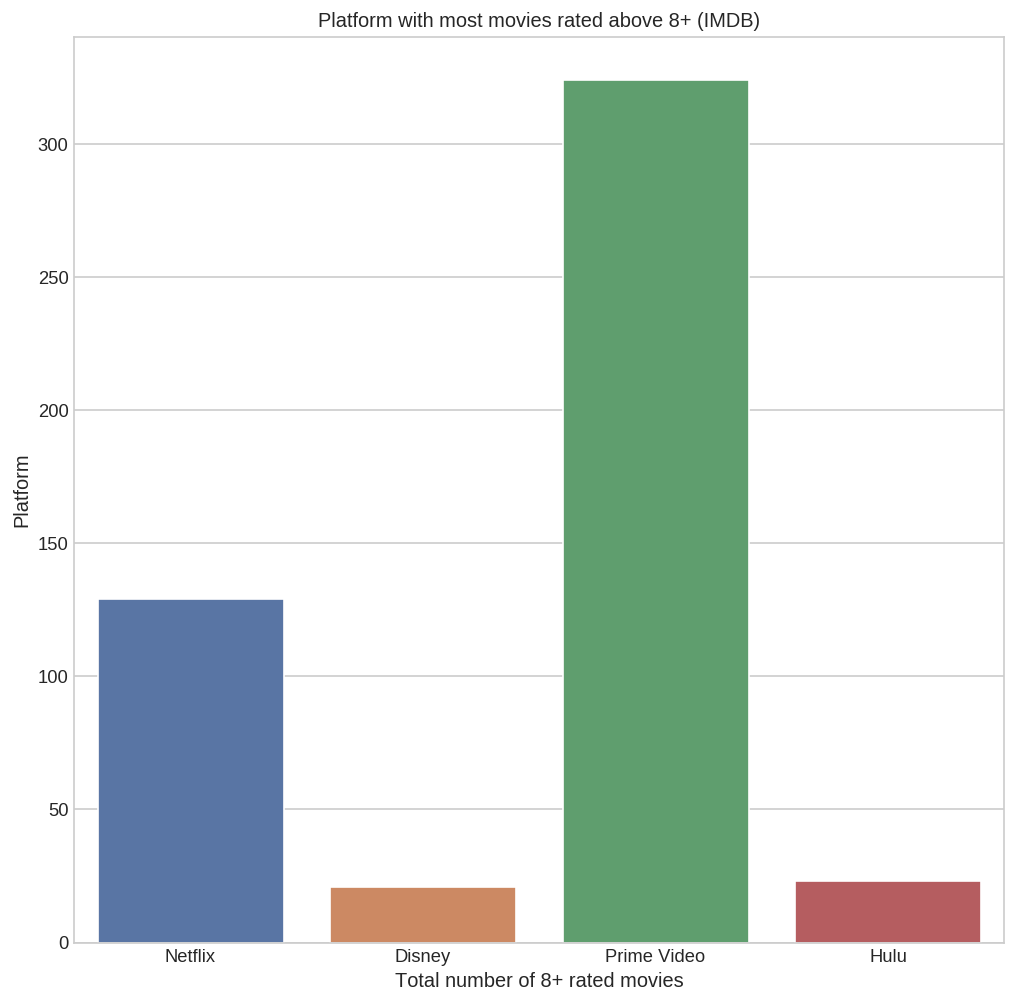

In [158]:
plt.figure(figsize = (10, 10))
sns.barplot(data = top_rated_data,
           x = top_rated_data['platforms'],
           y = top_rated_data['total_mov']
)
plt.ylabel('Platform')
plt.xlabel('Total number of 8+ rated movies')
plt.title('Platform with most movies rated above 8+ (IMDB)')
plt.show()

In [159]:
list_genre = dataset['Genres'].str.split(',',expand = True)

In [160]:
list_genre

,0,1,2,3,4,5,6,7,8
0,Action,Adventure,Sci-Fi,Thriller,None,None,None,None,None
1,Action,Sci-Fi,None,None,None,None,None,None,None
2,Action,Adventure,Sci-Fi,None,None,None,None,None,None
3,Adventure,Comedy,Sci-Fi,None,None,None,None,None,None
4,Western,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
16739,Comedy,Family,Fantasy,Horror,None,None,None,None,None
16740,Comedy,Family,Sci-Fi,None,None,None,None,None,None
16741,Documentary,None,None,None,None,None,None,None,None
16742,Documentary,None,None,None,None,None,None,None,None


In [161]:
# converting all elements of dataframe into Strings
list_genre = list_genre.applymap(str)

In [162]:
# extracting Genres from the df
genres = []
for i in range(0,9):
    list_genre[i]
    for j in range(0, 16744) :
        if (list_genre[i][j] not in genres) and list_genre[i][j] != 'None' and list_genre[i][j] != 'nan':
            genres.append(list_genre[i][j])
        else:
            pass  
genres

['Action',
 'Adventure',
 'Western',
 'Animation',
 'Biography',
 'Drama',
 'Crime',
 'Comedy',
 'Documentary',
 'Family',
 'Horror',
 'Thriller',
 'Mystery',
 'Fantasy',
 'Romance',
 'Short',
 'Sci-Fi',
 'Talk-Show',
 'Sport',
 'Reality-TV',
 'Musical',
 'Music',
 'War',
 'News',
 'History',
 'Game-Show',
 'Film-Noir']

No handles with labels found to put in legend.


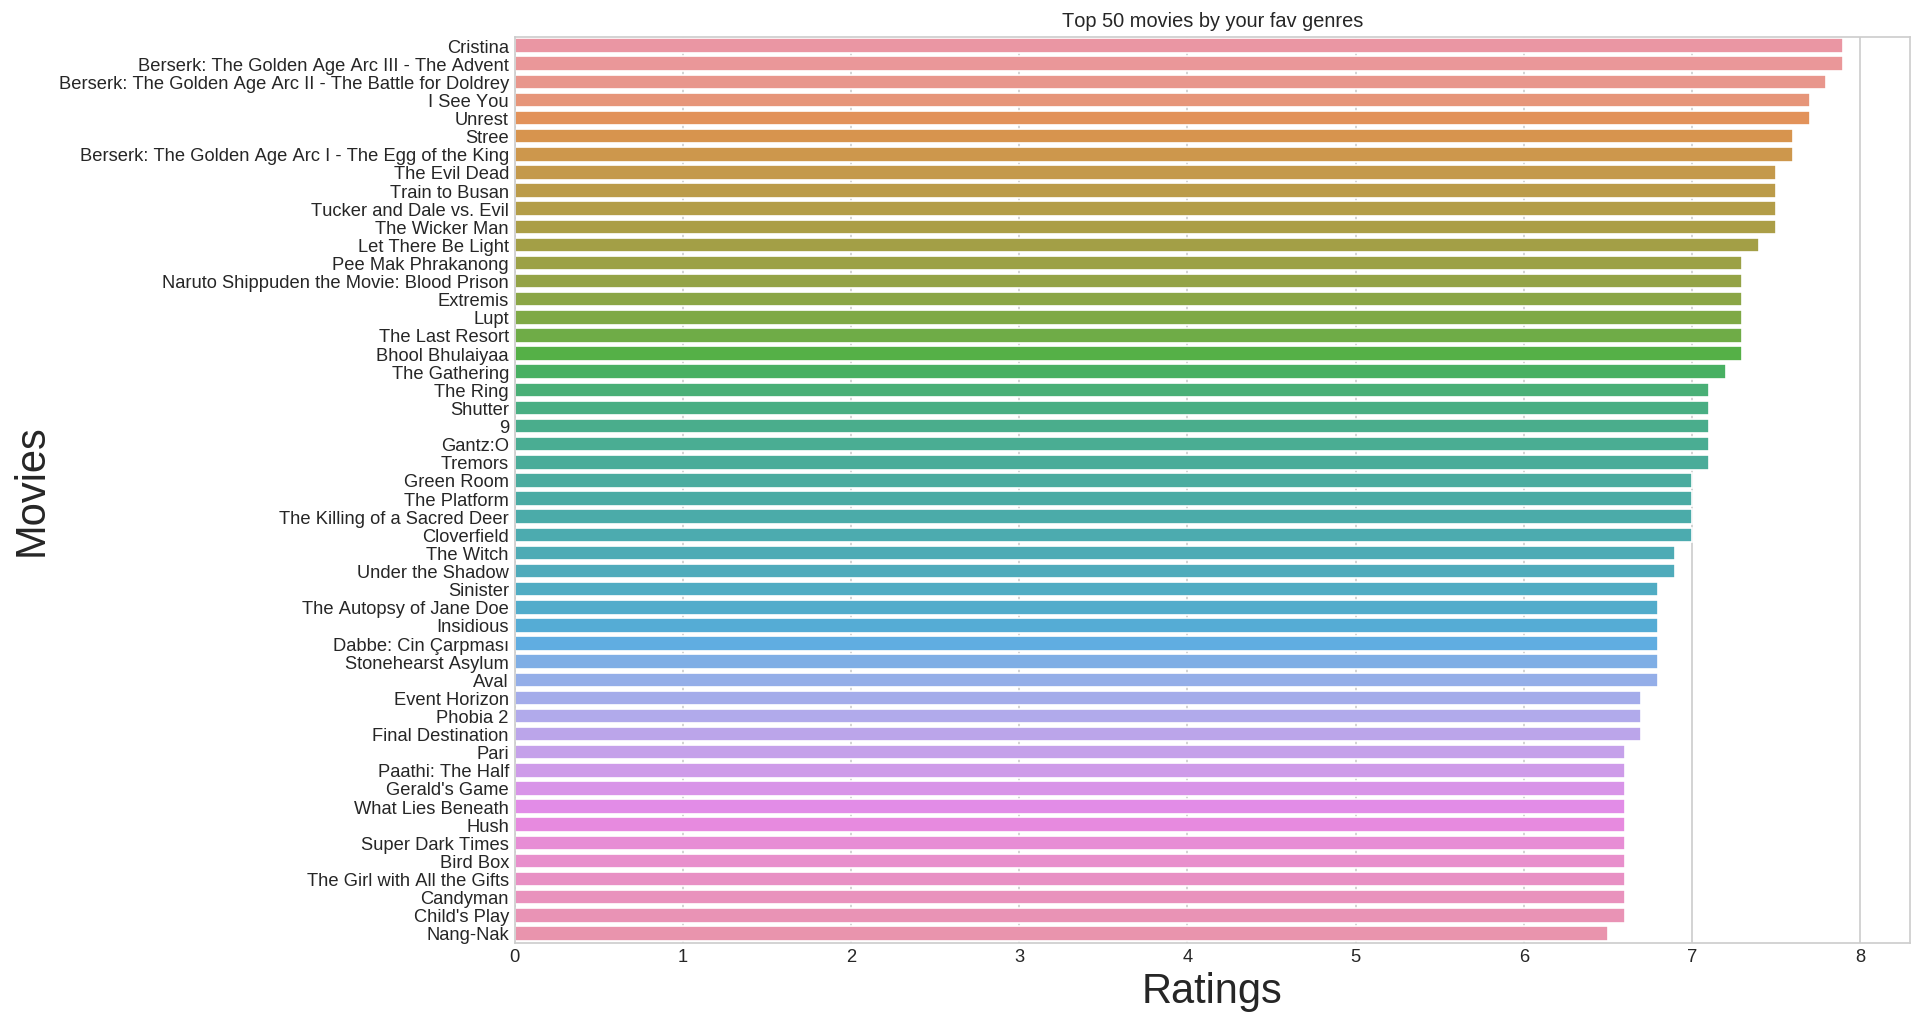

In [163]:
# the following function is used to display top rated movies based on your favourite Genres and respective platforms
def top_rated(genre, platform, n_top):
    genre = platform.loc[platform[genre] == 1]

    top_50 = genre.sort_values(by = 'IMDb', ascending = False).head(n_top)

    plt.figure(figsize = (15, 10))
    sns.barplot(data = top_50, y = 'Title', x = 'IMDb', dodge = False)
    plt.legend(loc = 'lower right')
    plt.xlabel('Ratings', FontSize = 25)
    plt.ylabel('Movies', FontSize = 25)
    plt.title('Top 50 movies by your fav genres',)
    plt.show()
    
top_rated ('Horror',netflix_movies, 50)

No handles with labels found to put in legend.


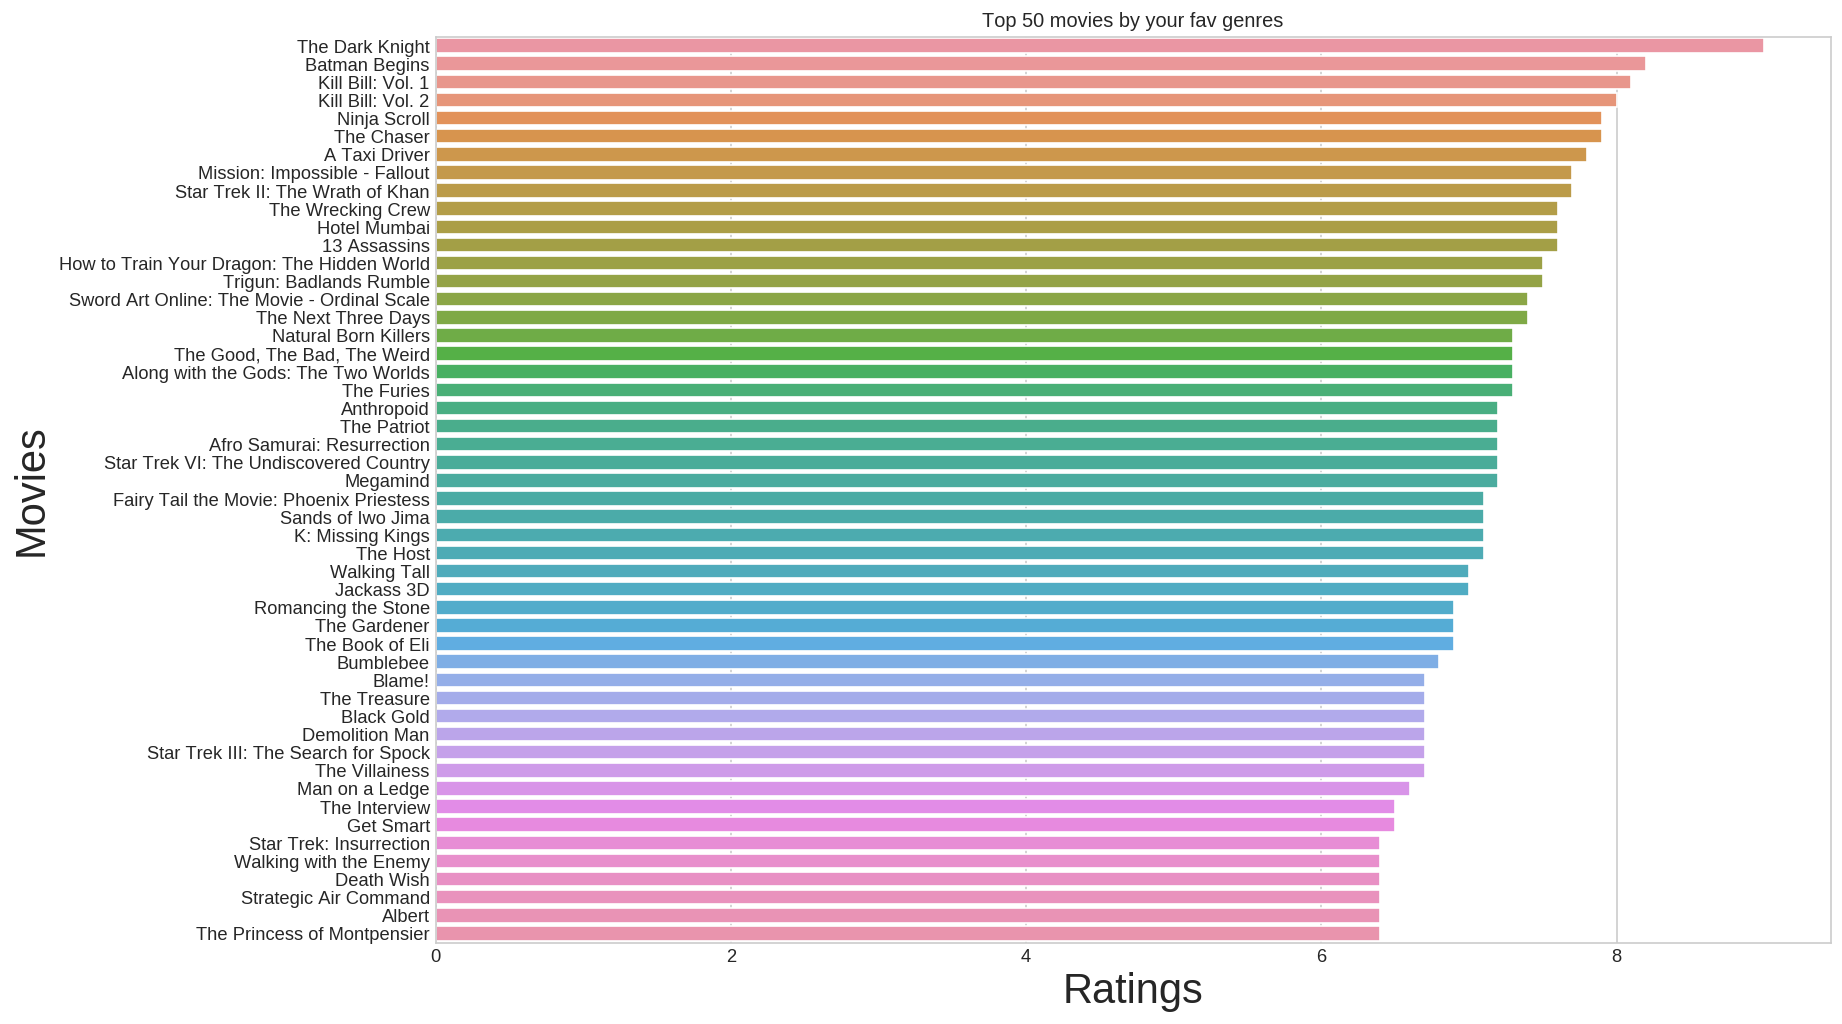

In [164]:
top_rated ('Action',hulu_movies, 50)

In [231]:
get_recommendations('The Dark Knight Rises')

299                              Batman Forever
65                              The Dark Knight
1359                                     Batman
428                              Batman Returns
2507                                  Slow Burn
119                               Batman Begins
1181                                        JFK
3854    Batman: The Dark Knight Returns, Part 2
9            Batman v Superman: Dawn of Justice
210                              Batman & Robin
Name: original_title, dtype: object